<a href="https://colab.research.google.com/github/hhboorstein/ds_portfolio/blob/main/DSBA_Unbalanced_Classes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ReneWind**

Renewable energy sources play an increasingly important role in the global energy mix, as the effort to reduce the environmental impact of energy production increases.

Out of all the renewable energy alternatives, wind energy is one of the most developed technologies worldwide. The U.S Department of Energy has put together a guide to achieving operational efficiency using predictive maintenance practices.

Predictive maintenance uses sensor information and analysis methods to measure and predict degradation and future component capability. The idea behind predictive maintenance is that failure patterns are predictable and if component failure can be predicted accurately and the component is replaced before it fails, the costs of operation and maintenance will be much lower.

The sensors fitted across different machines involved in the process of energy generation collect data related to various environmental factors (temperature, humidity, wind speed, etc.) and additional features related to various parts of the wind turbine (gearbox, tower, blades, break, etc.). 



## Objective
“ReneWind” is a company working on improving the machinery/processes involved in the production of wind energy using machine learning and has collected data of generator failure of wind turbines using sensors. They have shared a ciphered version of the data, as the data collected through sensors is confidential (the type of data collected varies with companies). Data has 40 predictors, 40000 observations in the training set and 10000 in the test set.

The objective is to build various classification models, tune them, and find the best one that will help identify failures so that the generator could be repaired before failing/breaking to reduce the maintenance cost. The different costs associated with maintenance are as follows:

- `Replacement cost = $40,000`
- `Repair cost = $15,000`
- `Inspection cost = $5,000`

“1” in the target variables should be considered as “failure” and “0” will represent “No failure”.

## Data Description
- The data provided is a transformed version of original data which was collected using sensors.
- Train.csv - To be used for training and tuning of models. 
- Test.csv - To be used only for testing the performance of the final best model.
- Both the datasets consist of 40 predictor variables and 1 target variable

## Importing libraries

First update scikit-learn and imbalanced-learn libraries.

In [ ]:
! pip install scikit-learn -U

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 79.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2


In [ ]:
! pip install imbalanced-learn -U

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 KB 10.5 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.8.1
    Uninstalling imbalanced-learn-0.8.1:
      Successfully uninstalled imbalanced-learn-0.8.1


Then we can import the necessary libraries.

In [ ]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

# data processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import KNNImputer
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# models building
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# model assessment and production
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.ensemble import StackingClassifier

In [ ]:
# display setups

# plotting theme
sns.set_theme()

# dataframe display all columns
pd.set_option('display.max_columns',None)

## Loading Data

In [ ]:
df=pd.read_csv('Renewind_Train.csv')

In [ ]:
data=df.copy()

## EDA

In [ ]:
data.sample(10,random_state=1)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
3841,-1.761261,1.725575,3.115833,-0.722076,1.636716,-0.665690,-1.947430,0.340637,-0.434492,-1.861200,-0.748612,1.483686,3.233458,-1.749122,-5.027887,-1.380684,-1.399922,2.132650,-1.505987,-2.451394,-4.512434,0.036412,0.488204,2.010276,-2.194374,5.600887,-4.419503,-3.459057,1.848695,3.183373,3.131519,4.559034,5.339557,-4.860047,3.971955,1.084243,-0.286629,-2.123846,0.088027,0.467075,0
12898,-0.319513,-3.223125,6.945362,-6.073991,0.560963,-1.151006,-1.368454,-0.203942,-3.529692,5.112241,-3.728806,2.433346,3.220423,1.316607,-1.652448,-0.902062,-6.406294,2.609491,-0.583582,-3.180174,-3.682714,-0.107914,-3.111936,1.132707,1.378427,2.399556,5.679397,-3.810228,-4.106580,-3.610371,9.925717,2.086696,0.300373,-0.581224,2.849599,11.783096,-1.036491,-2.656733,4.048503,-0.043561,0
15032,3.660333,-0.500171,1.673259,-0.759881,-3.446873,-0.177149,-0.150797,-0.962328,0.798321,-0.378106,2.456049,1.879260,2.194074,-1.375423,-1.303997,-3.645691,-1.916947,-0.564766,3.382290,-0.034927,-5.565015,2.032844,-0.867979,-1.966172,0.320279,-0.502116,2.028311,-0.768731,1.730565,3.023456,-2.705545,-3.397233,0.711632,0.350068,5.073397,-2.271627,-0.376924,-0.115856,-0.630295,-1.382311,0
36781,-2.031378,-7.075963,1.609581,-2.808285,-2.626699,-3.161704,-2.401735,2.357427,-1.254624,2.679572,-4.866034,5.473158,5.339906,2.596990,-5.179196,-2.976010,-0.568500,3.978816,1.724852,6.053674,-5.327246,3.560616,3.365471,-0.391724,1.284162,-5.200010,2.720958,-0.473470,-4.738653,0.069819,-1.207865,0.449110,-5.094617,2.979341,2.545381,7.661457,2.721677,-5.888977,3.233609,-2.895987,0
9201,-1.167479,4.636223,-1.011644,0.316850,3.275565,-0.310062,1.388811,4.651706,-4.848882,-2.074384,3.231886,5.032511,-2.634830,-2.825284,1.290487,6.432091,0.251476,-1.082105,0.626093,-7.337963,0.912257,-0.578727,5.034060,8.326799,-4.863529,5.333237,-8.192814,-1.593566,5.291905,6.553607,5.233752,10.877396,8.250367,-5.159849,4.674169,-3.516928,-1.730339,1.969370,-3.425079,2.554127,0
21288,-3.187048,3.810940,0.850021,1.188452,3.331867,-1.399935,-1.550283,0.635168,-0.389022,-2.848663,-3.003486,3.366907,2.550711,-2.365782,-6.294215,-2.694268,1.701079,3.318560,-0.941472,-2.522348,-4.691335,1.915986,4.572873,6.014727,-3.252703,6.471669,-7.581418,-2.034078,-0.284077,2.482489,0.878916,7.499800,3.778780,-5.057147,2.754992,-0.312605,0.304002,0.109490,-0.080787,-0.263837,0
37321,5.669580,1.844251,7.218002,1.555360,-3.158366,-2.388045,-0.937380,-2.299472,3.368328,-0.475084,-1.593526,-0.763408,4.474542,-1.536328,-2.689027,-7.051011,-1.965468,-2.414158,3.769097,0.893762,-9.227253,1.080952,-4.955377,-3.369827,2.379708,4.442623,3.109184,-2.405830,-1.814943,-1.632428,0.736474,-4.127790,-1.698119,-0.144663,6.158802,-0.501844,-2.075539,-3.096800,0.029782,-2.895171,0
8600,-2.459670,-2.393870,3.225757,0.063384,-0.580143,-2.797114,-0.634555,2.118902,-2.976534,2.924087,-3.354634,4.535033,0.790923,0.388404,-0.780539,0.137287,-0.147010,0.193798,4.075666,1.939926,-1.893998,0.262768,-0.026678,3.035784,0.127010,-0.972351,0.181684,0.249843,-2.562915,-0.478893,2.429896,2.392210,-2.040141,3.390597,2.891005,5.108812,0.085175,-1.349147,2.056523,-2.479685,0
33089,1.001489,0.983718,-2.561203,3.374567,2.495414,-0.720727,0.067609,3.662200,0.327424,-1.763364,-3.399646,-4.088555,-5.765949,1.293401,4.038515,3.405233,6.860836,-0.479386,-3.237459,2.401008,4.419077,-0.393963,2.743099,4.115304,1.274670,-1.566217,-4.673000,2.077497,-0.692994,-1.068473,2.815314,5.783949,-1.469405,-2.904733,-2.098224,-2.400717,-0.437158,-3.385150,-3.896752,3.312009,1
39511,-3.648807,-1.589335,-0.575212,0.649347,1.329551,-2.730112,-2.246243,2.806568,-0.600226,-1.071473,-5.598787,4.039250,2.624120,0.526896,-5.738545,-2.256579,3.684117,4.407944,-0.596813,3.524609,-3.745387,3.215177,6.282294,4.594613,-1.079856,-0.412728,-5.065619,-0.157468,-3.058230,1.398945,-1.026855,6.162144,-1.610211,-1.636248,1.450378,2.

* The ciphered data consists of floating point numbers with values near 0. There are both positive and negative values.

* The target variable is categorical, Boolean in fact. There seems, at first glance, to be imbalance in the target classes.

In [ ]:
data['Target'].value_counts(normalize=True)

0    0.945325
1    0.054675
Name: Target, dtype: float64

Indeed, around 95% of the target observations are 0. From the data dictionary, we learn this indicates 'No Failure', which is ideal. Thus, only around 5% of observations are 'Failure' cases.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      39954 non-null  float64
 1   V2      39961 non-null  float64
 2   V3      40000 non-null  float64
 3   V4      40000 non-null  float64
 4   V5      40000 non-null  float64
 5   V6      40000 non-null  float64
 6   V7      40000 non-null  float64
 7   V8      40000 non-null  float64
 8   V9      40000 non-null  float64
 9   V10     40000 non-null  float64
 10  V11     40000 non-null  float64
 11  V12     40000 non-null  float64
 12  V13     40000 non-null  float64
 13  V14     40000 non-null  float64
 14  V15     40000 non-null  float64
 15  V16     40000 non-null  float64
 16  V17     40000 non-null  float64
 17  V18     40000 non-null  float64
 18  V19     40000 non-null  float64
 19  V20     40000 non-null  float64
 20  V21     40000 non-null  float64
 21  V22     40000 non-null  float64
 22

Just to double-check the integrity of our data, we confirm that the forty ciphered features are all stored as floats. This indicates to me that there aren't any errant entries, such as '?', which would force the column to be string data type.

We see some columns have missing entries.

In [ ]:
data.isna().sum().loc[data.isna().sum()>0].index.tolist()

['V1', 'V2']

Columns 'V1' and 'V2' have missing values.

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
V1,39954.0,-0.288120,3.449072,-13.501880,-2.751460,-0.773518,1.836708,17.436981
V2,39961.0,0.442672,3.139431,-13.212051,-1.638355,0.463939,2.537508,13.089269
V3,40000.0,2.505514,3.406263,-11.469369,0.202682,2.265319,4.584920,18.366477
V4,40000.0,-0.066078,3.437330,-16.015417,-2.349574,-0.123691,2.148596,13.279712
V5,40000.0,-0.044574,2.107183,-8.612973,-1.507206,-0.096824,1.346224,9.403469
V6,40000.0,-1.000849,2.036756,-10.227147,-2.363446,-1.006635,0.373909,7.065470
V7,40000.0,-0.892793,1.756510,-8.205806,-2.036913,-0.934738,0.206820,8.006091
V8,40000.0,-0.563123,3.298916,-15.657561,-2.660415,-0.384188,1.714383,11.679495
V9,40000.0,-0.007739,2.161833,-8.596313,-1.493676,-0.052085,1.425713,8.507138
V10,40000.0,-0.001848,2.183034,-11.000790,-1.390549,0.105779,1.486105,8.108472


Looking at the table of statistics, it is challenging to glean much insight. The boxplots below should help in interpreting the data.

### Plotting histograms and boxplots for all the variables

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  
    plt.suptitle(feature,fontsize=20)
    # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

### Plotting all the features at one go

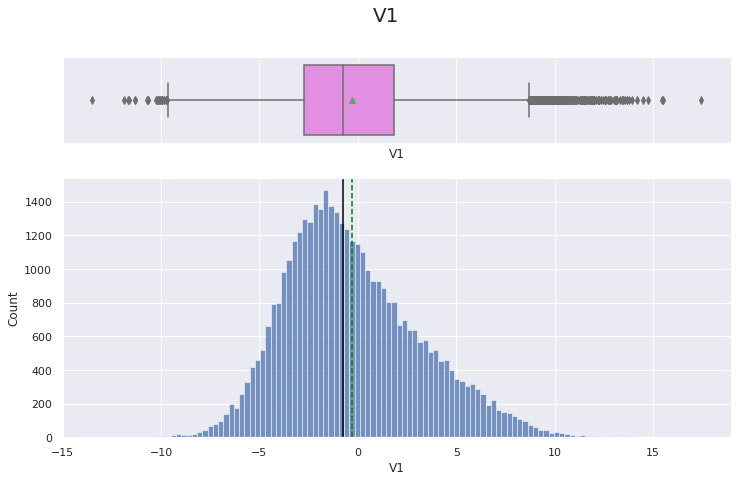

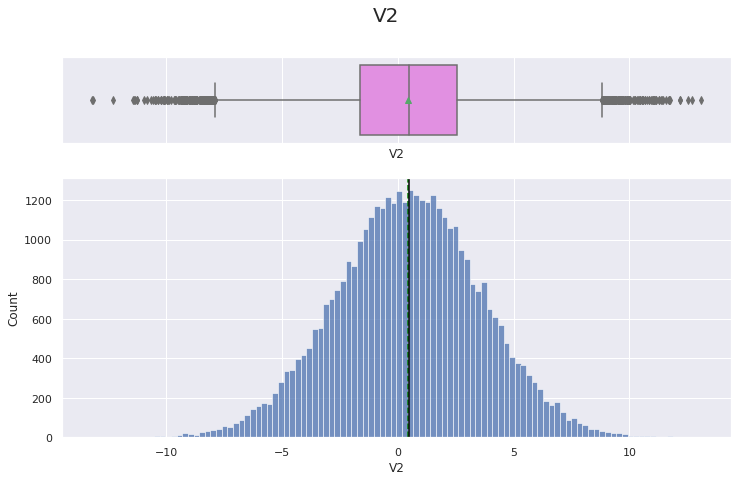

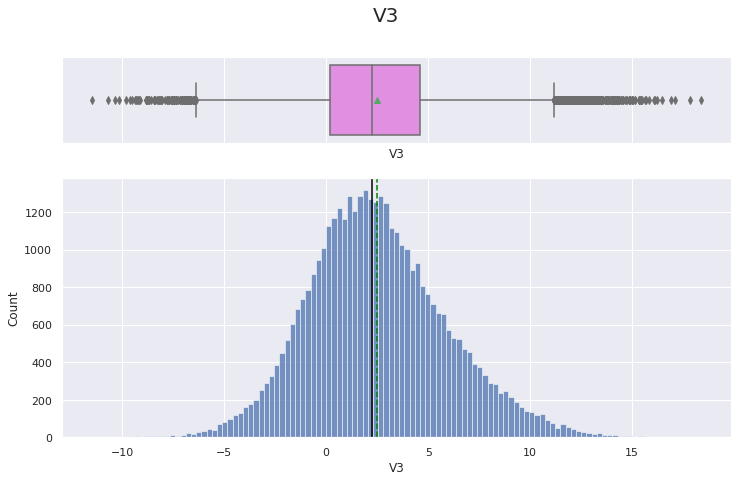

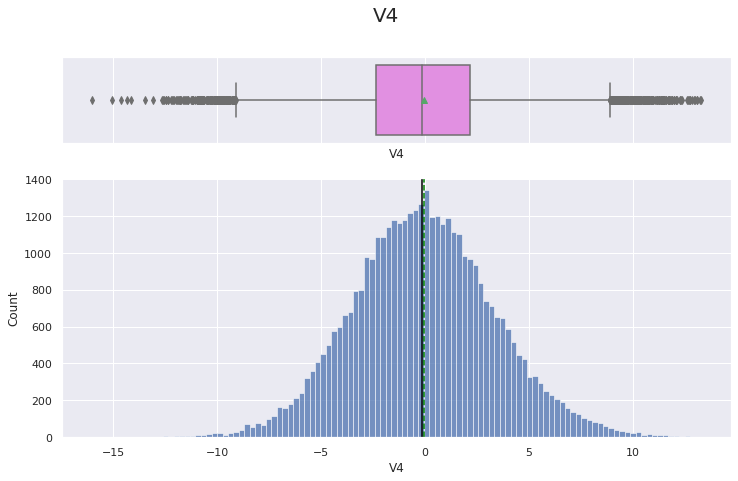

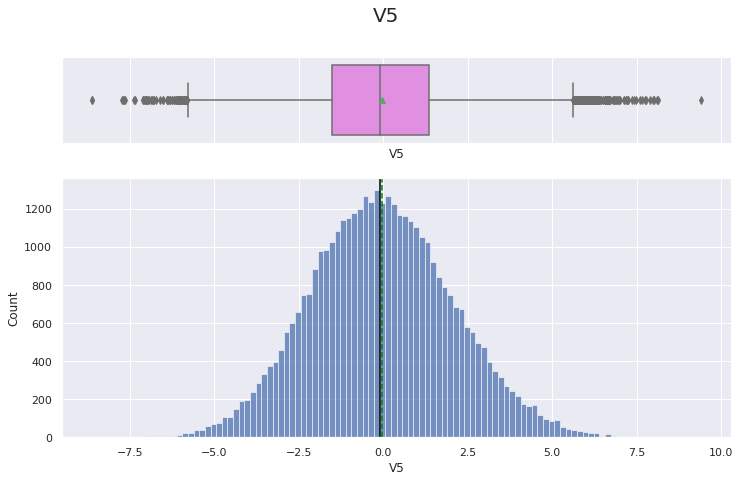

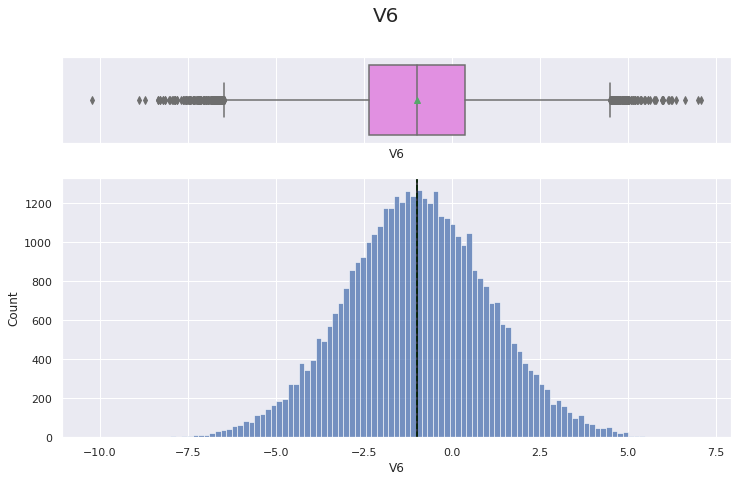

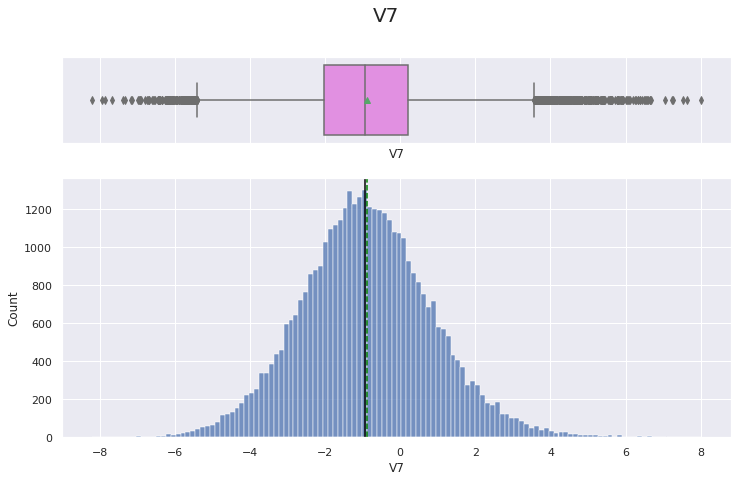

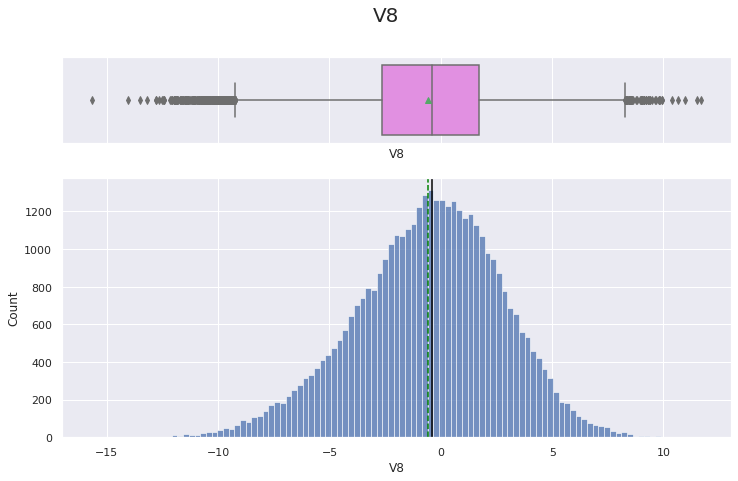

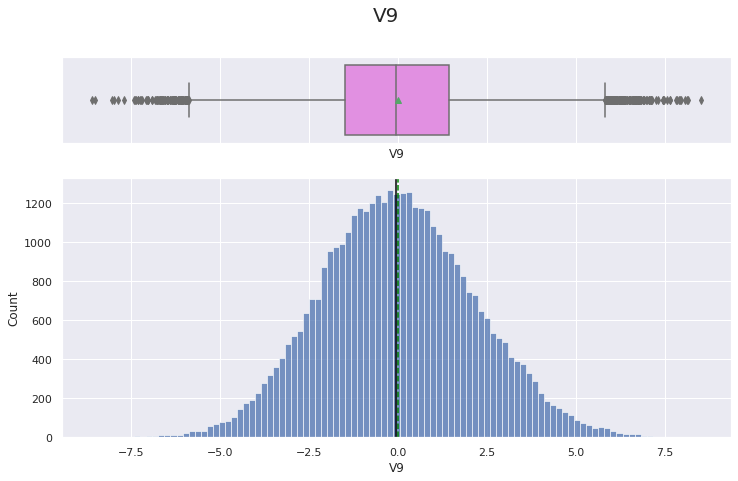

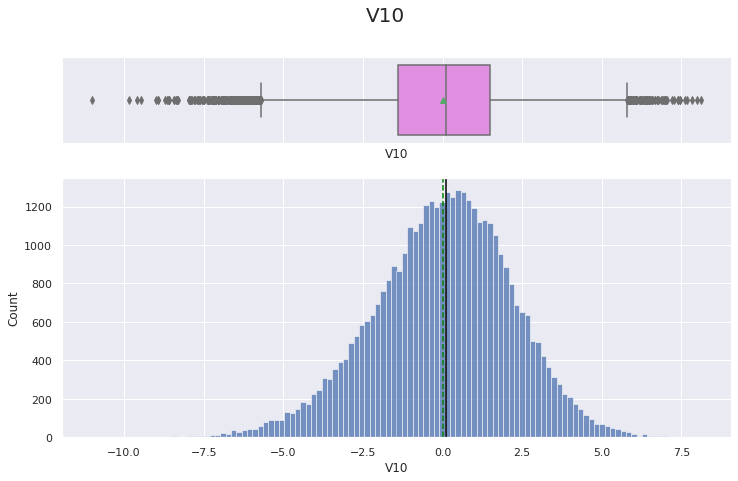

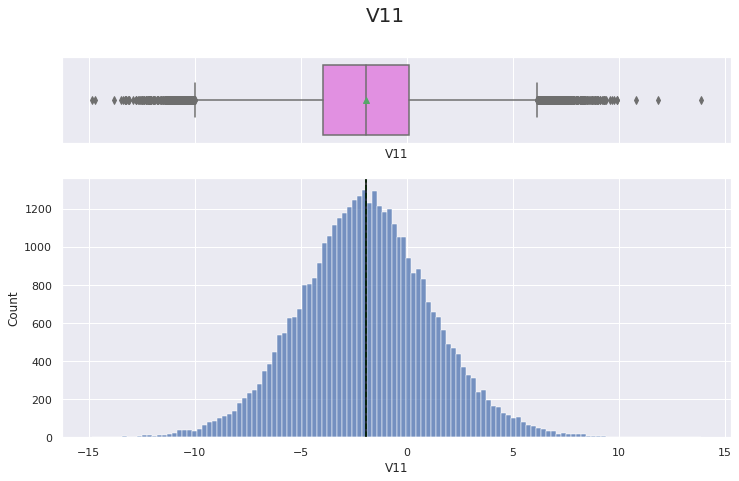

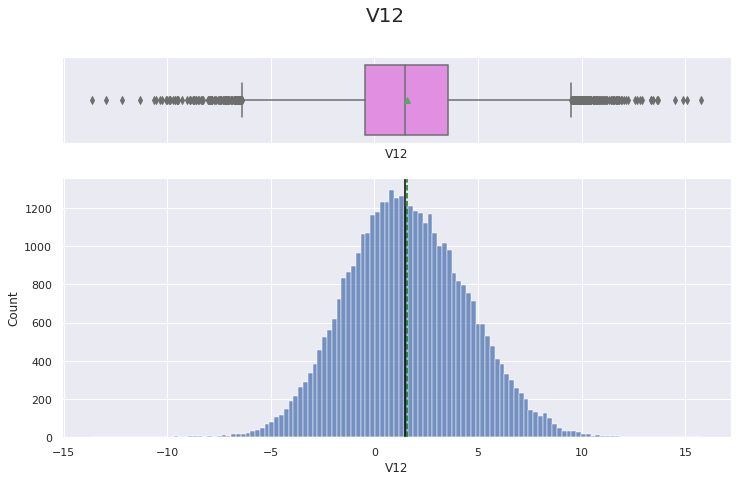

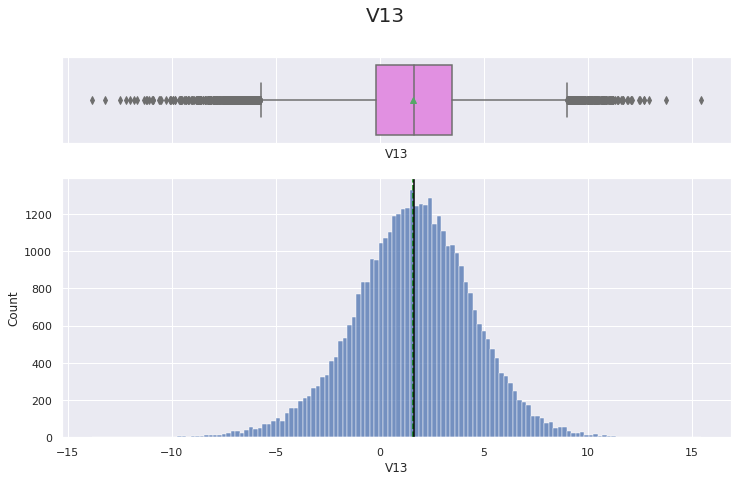

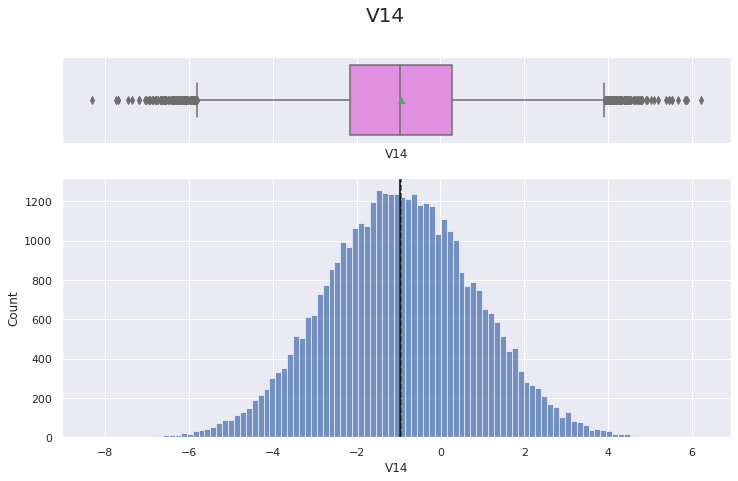

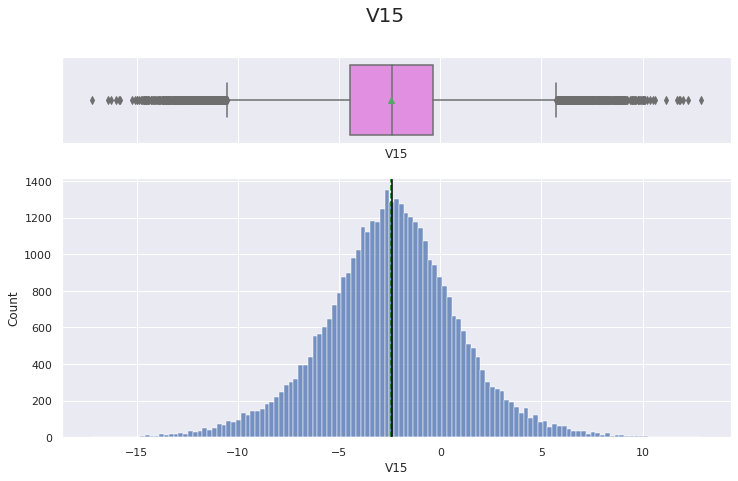

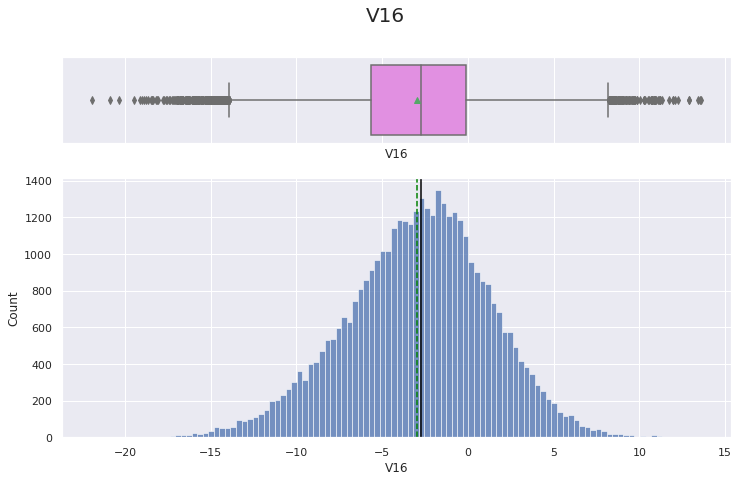

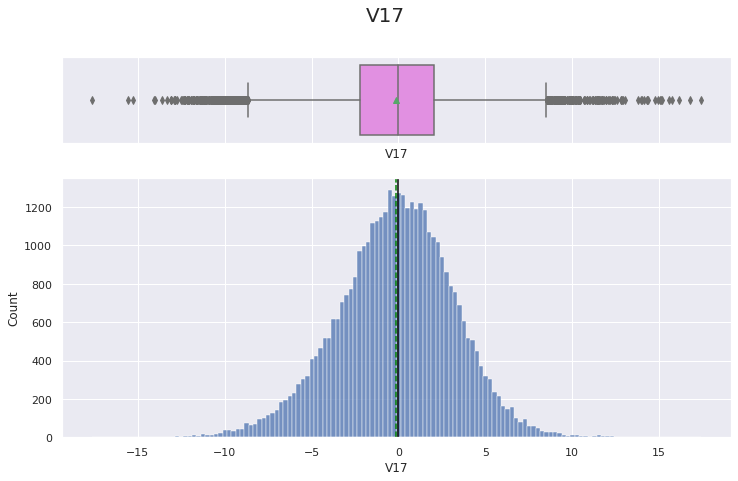

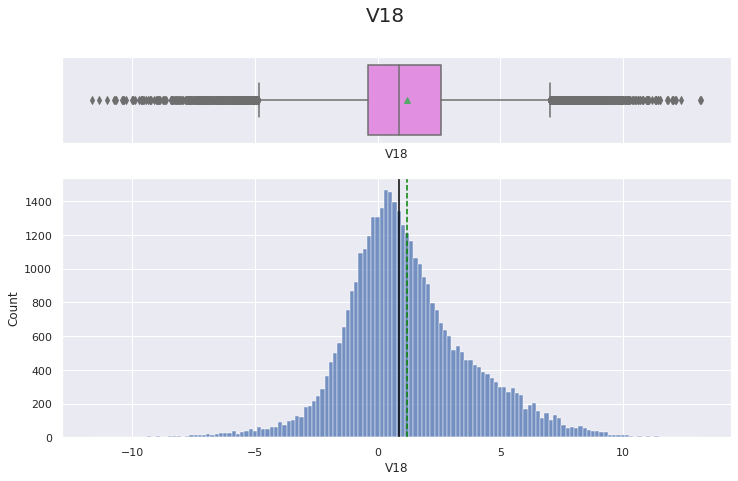

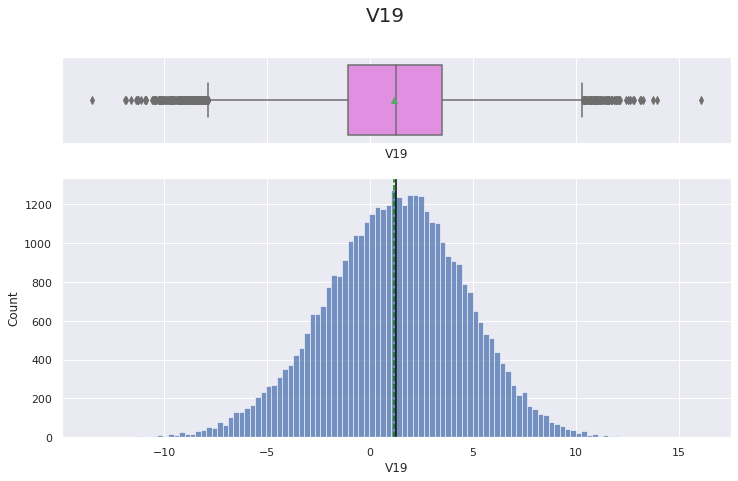

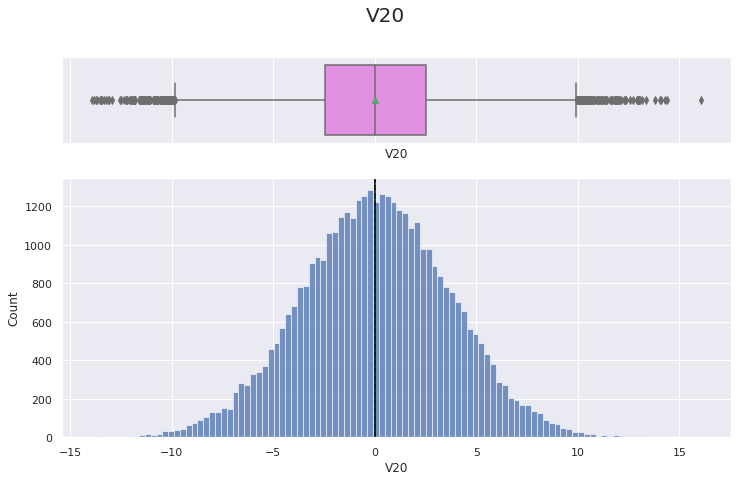

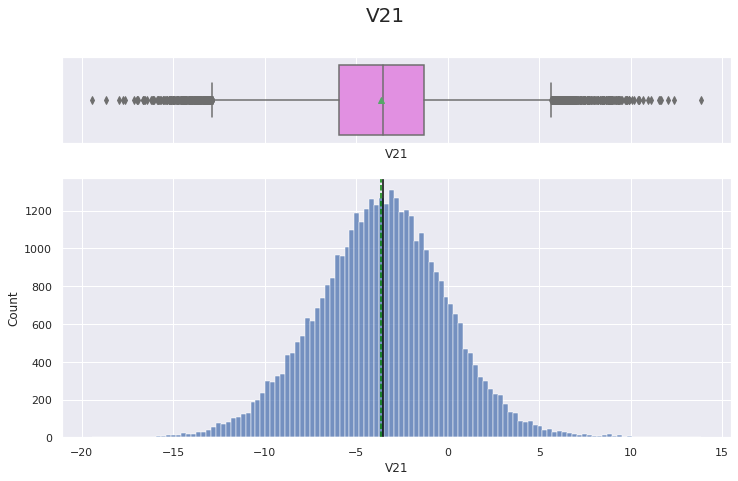

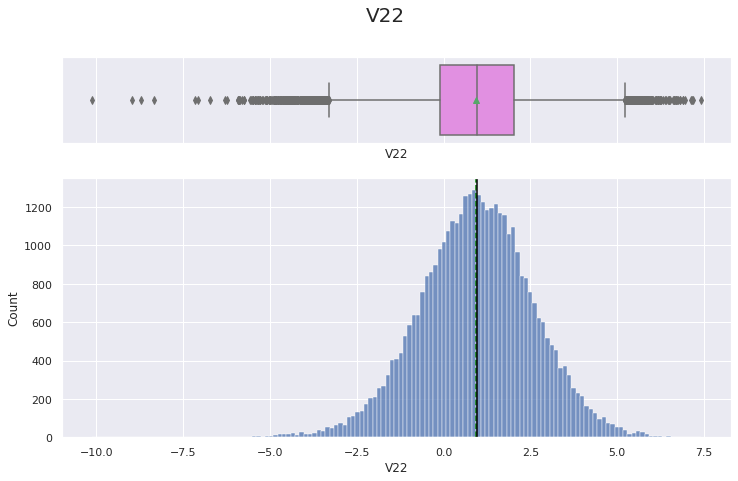

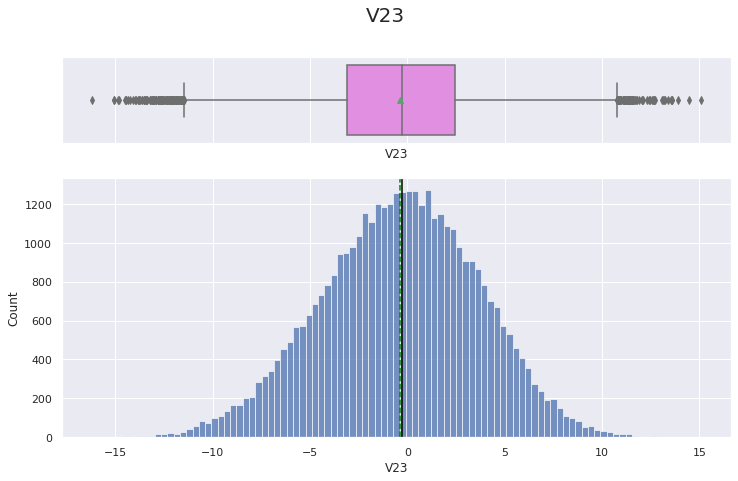

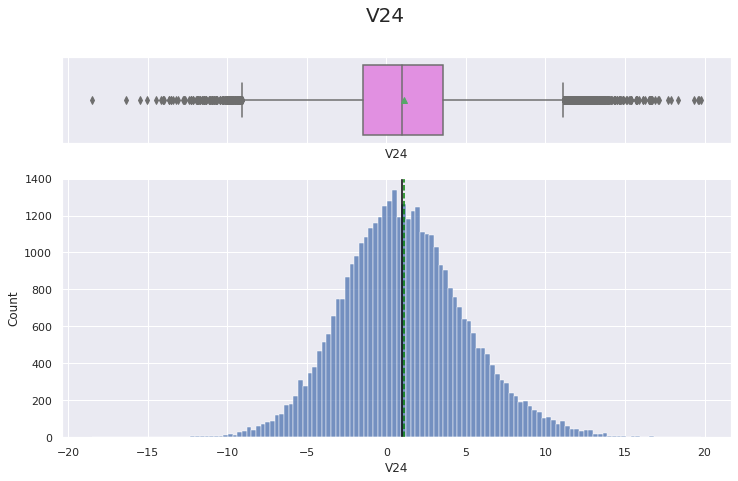

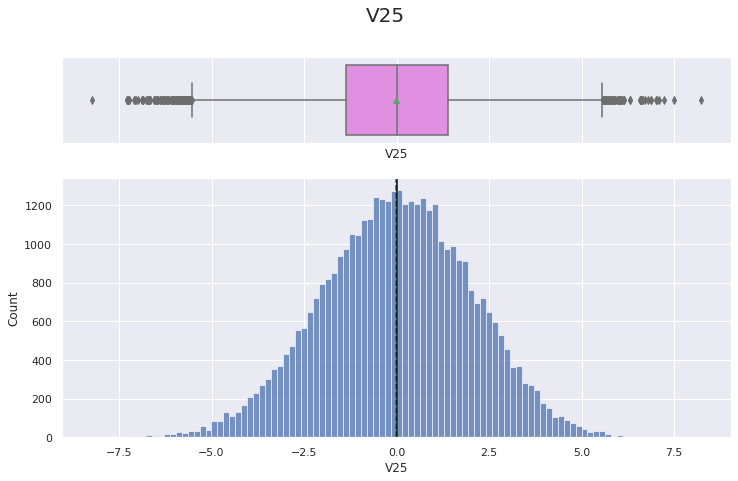

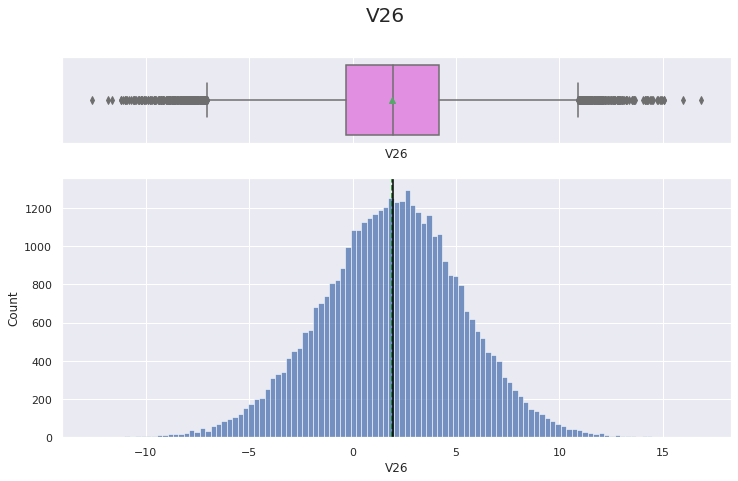

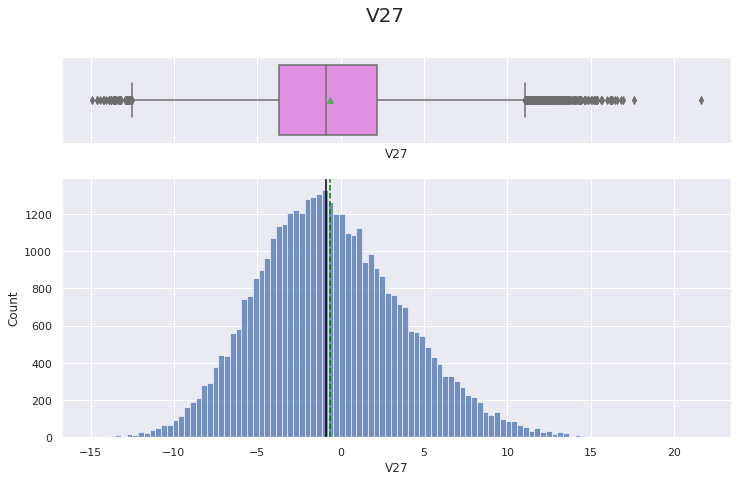

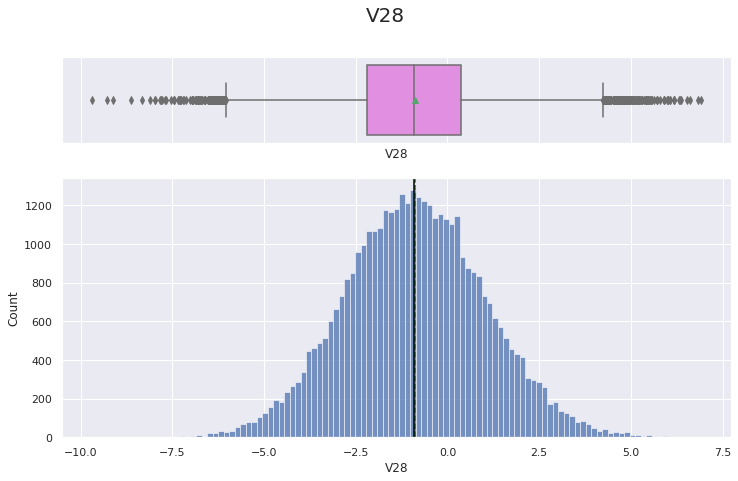

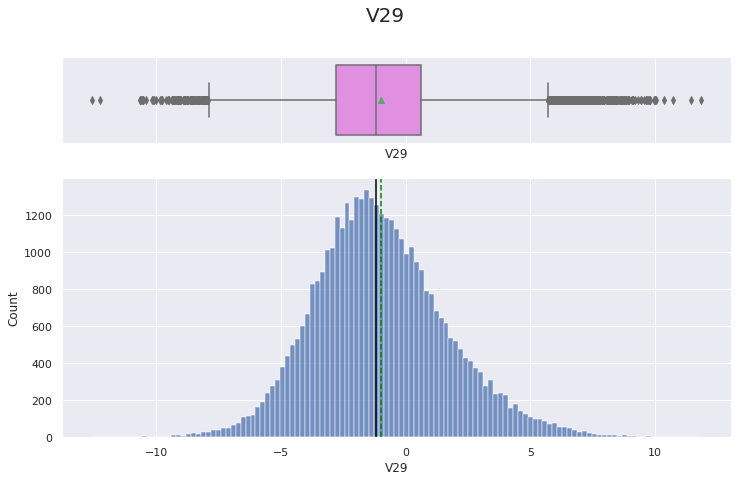

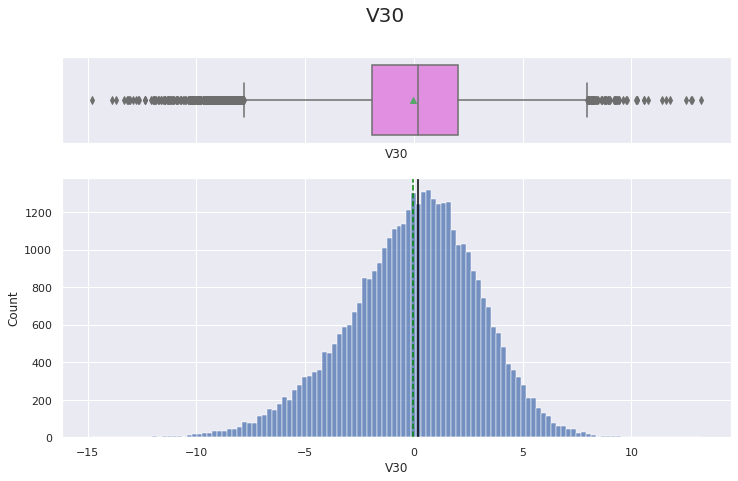

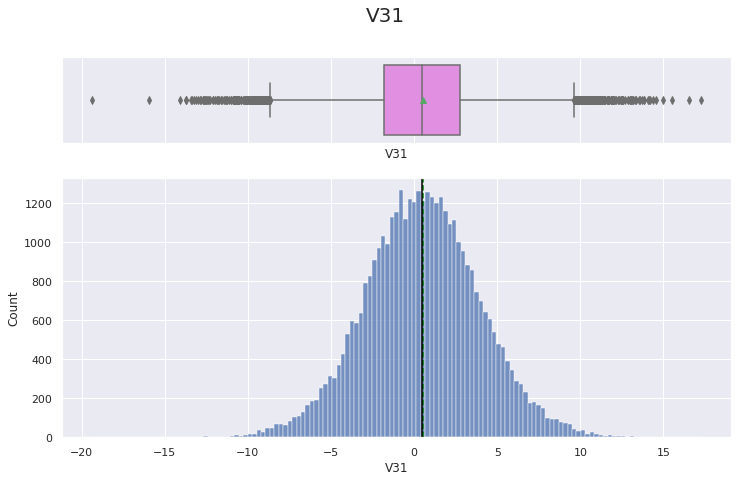

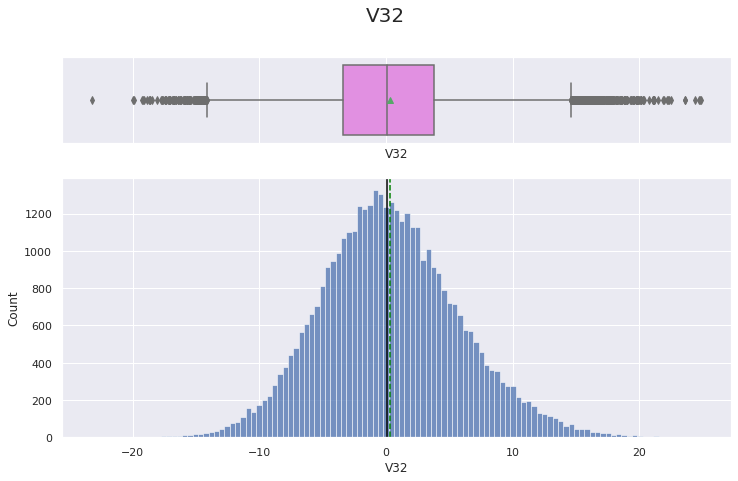

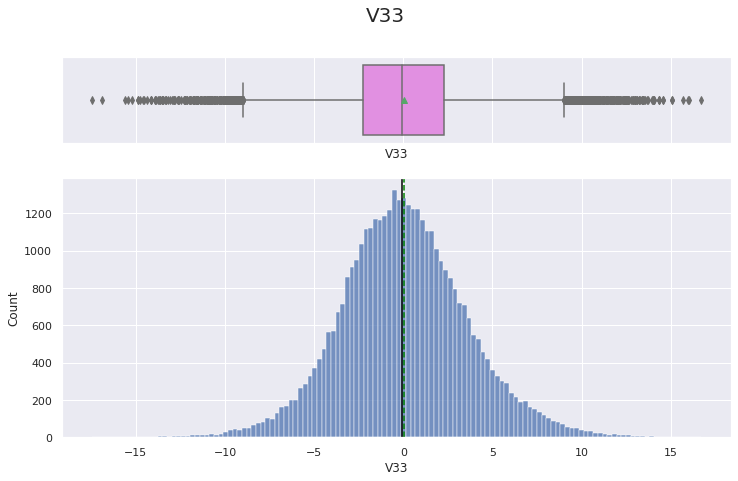

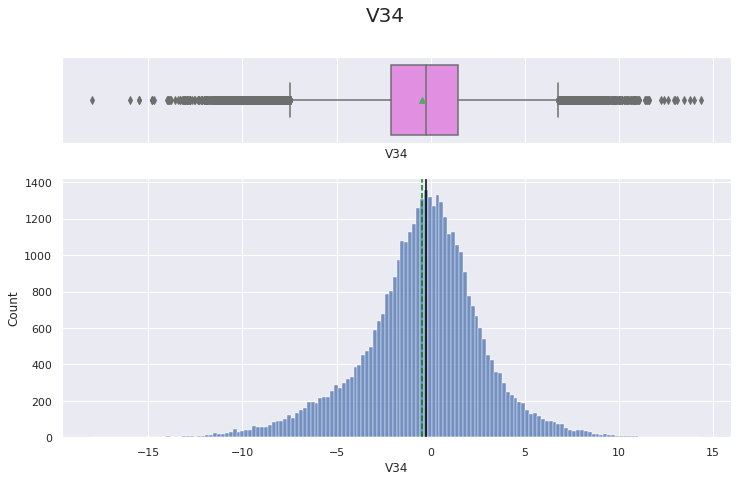

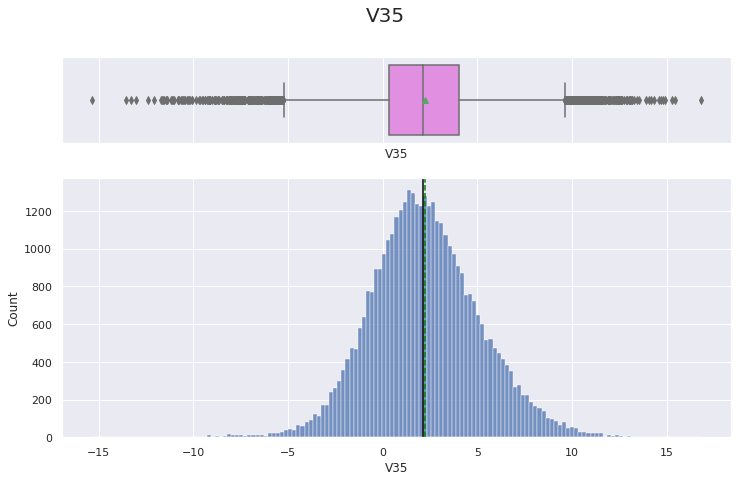

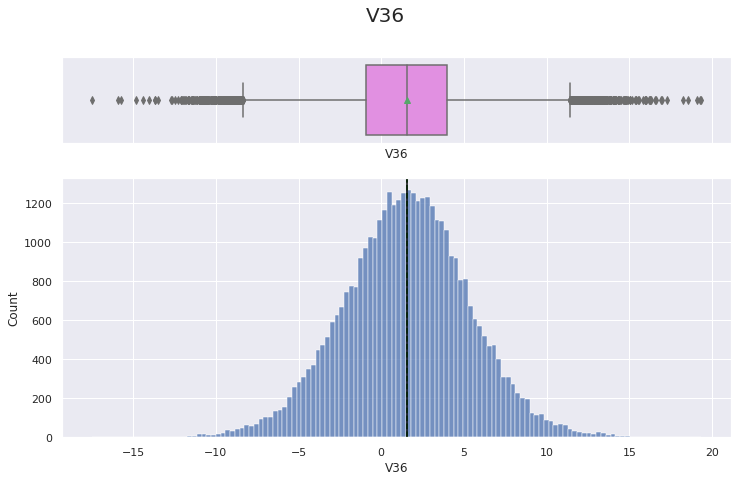

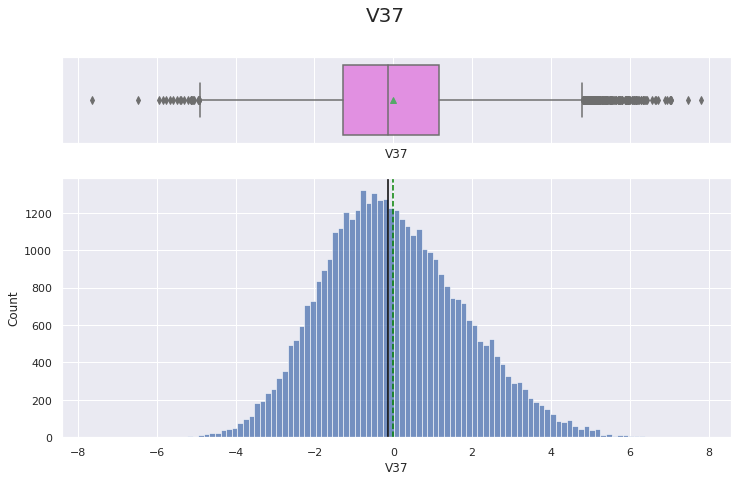

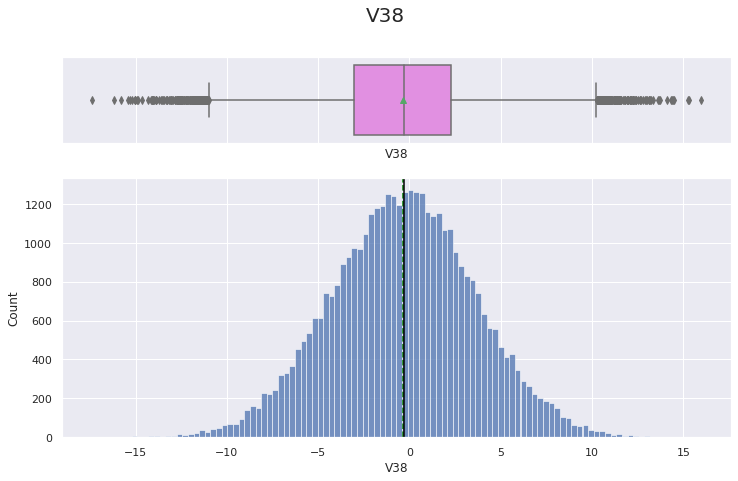

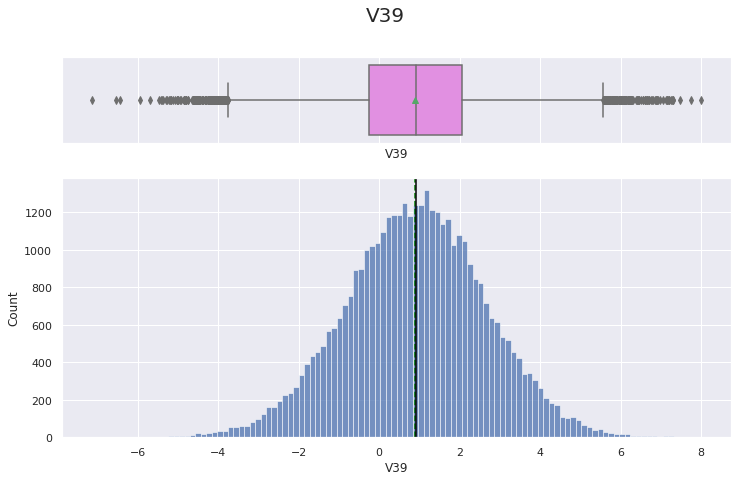

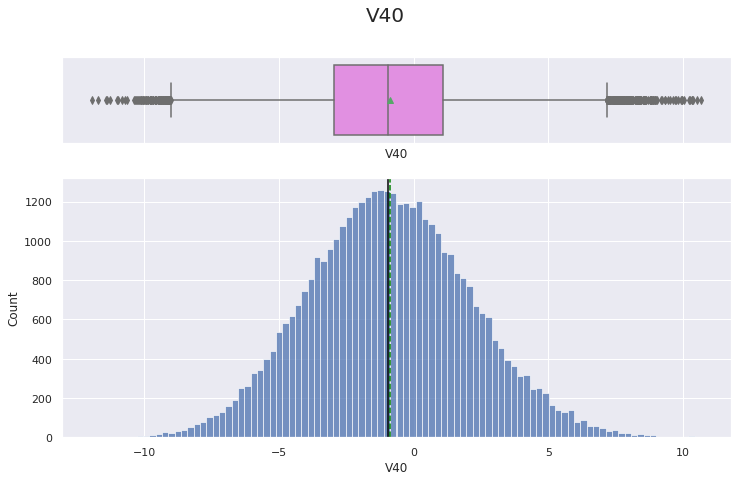

In [ ]:
for feature in data.drop('Target',axis=1).columns:
  histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None);
  plt.show()
  print('')

Each feature is approximately normally distributed. The following features have slight right or left skew: V1, V8, V16, V18, V27, V35, V37. All features have a median around 0.

There are apparent outliers present in every feature, as can be seen in the boxplots. Without context for the nature of each feature, that is, because the features are ciphered, we cannot make any determenation regarding the treatment of these outliers.

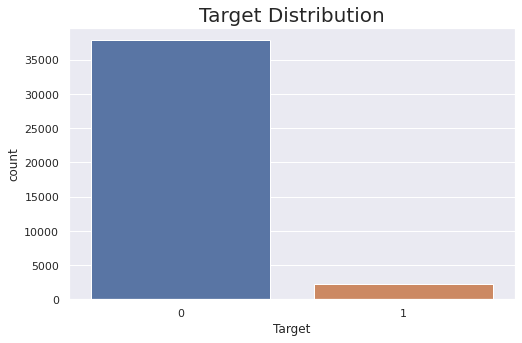

In [ ]:
plt.figure(figsize=(8,5))
plt.title('Target Distribution',fontsize=20)
sns.countplot(data=data,x='Target');

Since a boxplot and histogram are not appropriate for the target variable, which is categorical, we instead plot it with a countplot. We find that cases requiring the replacement of equipment are fairly rare.

In the next section, we will process the data for modeling. This includes scaling the features so they have approximately mean 0 and standard deviation 1.

## Data Pre-processing

In [ ]:
data['Target']=pd.Categorical(data['Target'])

To start, we change the target variable type to categorical.

In [ ]:
X=data.drop('Target',axis=1)
y=data['Target']

In [ ]:
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.25,stratify=y,random_state=57)

We separate our data set. First, we break off the target variable. Then we split X and y into training and validation sets. Recall that we have a separate CSV file with test data for final model production, so we need not apportion a test set here.

In [ ]:
pre=make_pipeline(
    StandardScaler(),
    KNNImputer()
).set_output(transform='pandas')

We next make a simple pre-processing pipeline that outputs pandas DataFrames. We will use this to scale our data and impute missing values:
* We will scale columns so they have mean 0 and standard deviation 1.
* We impute missing data using the K Nearest Neighbors method. By default, we use 5 neighbors.

In [ ]:
X_train=pre.fit_transform(X_train)

We fit the pipeline on the training data and transform it.

In [ ]:
X_val=pre.transform(X_val)

By fitting the pipeline on the _training_ data and then transforming the validation data using this pipeline, we avoid data leakage: The data in the validation set does not influence the means, standard deviations, or nearest neighbors calculation.

## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model. 
- False positives (FP) are failure detections in a generator where there is no failure.

### Which metric to optimize?

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

### Functions

The following functions will assist with model building and assessment. Some are adapted from my previous projects.

In [ ]:
def confusion_heatmap(model,show_scores=True):
  '''Heatmap of confusion matrix for
  model performance on validation data.'''

  actual=y_val
  predicted=model.predict(X_val)

  # generate confusion matrix
  cm=metrics.confusion_matrix(actual,predicted)
  cm=np.flip(cm).T

  # heatmap labels
  labels=['TP','FP','FN','TN']
  cm_labels=np.array(cm).flatten()
  cm_percents=np.round((cm_labels/np.sum(cm))*100,3)
  annot_labels=[]
  for i in range(4):
    annot_labels.append(str(labels[i])+'\nCount:'+str(cm_labels[i])+'\n'+str(cm_percents[i])+'%')
  annot_labels=np.array(annot_labels).reshape(2,2)

  # print figure
  plt.figure(figsize=(8,5))
  plt.title('Confusion Matrix',fontsize=20)
  sns.heatmap(data=cm,
              annot=annot_labels,
              annot_kws={'fontsize':'x-large'},
              xticklabels=[1,0],
              yticklabels=[1,0],
              cmap='Greens',
              fmt='s')
  plt.xlabel('Actual',fontsize=14)
  plt.ylabel('Predicted',fontsize=14)
  plt.tight_layout();

  # scores
  if show_scores==True:
    scores=['Accuracy','Precision','Recall','F1']
    score_list=[metrics.accuracy_score(actual,predicted),
                metrics.precision_score(actual,predicted),
                metrics.recall_score(actual,predicted),
                metrics.f1_score(actual,predicted)]
    df=pd.DataFrame(index=scores)
    df['Scores']=score_list
    return df
  return

# alias function name to something shorter
ch=confusion_heatmap

The function above prints a confusion matrix of model performance on validation data. It also prints a table with validation accuracy, precision, recall, and F1 scores.

In [ ]:
def cv_recall(estimator,sample_strategy=None):
  '''Compute a recall score using
  stratified k-fold cross-validation.'''

  # define data based on sampling strategy
  if sample_strategy=='over':
    X_data=X_train_over
    y_data=y_train_over
  elif sample_strategy=='under':
    X_data=X_train_under
    y_data=y_train_under
  else:
    X_data=X_train
    y_data=y_train
  
  # cv strategy
  e=estimator
  kfold=StratifiedKFold(n_splits=5,
                      shuffle=True,
                      random_state=2)
  
  # run cv
  cvs=cross_val_score(estimator=e,
                    X=X_data,
                    y=y_data,
                    scoring='recall',
                    cv=kfold,
                    n_jobs=-1)
  return cvs.mean()

The function above returns the mean cross-validated recall for a given model.

In [ ]:
model_table=pd.DataFrame(columns=['Train Acc',
                                  'Val Acc',
                                  'Train Recall',
                                  'CV Recall',
                                  'Val Recall'])

def tabulate(model,name,sample=None,cvs=None):
  '''Compute train/val accuracy and
  recall for a given model. Add to table.'''

  # run predictions with model
  X_val_pred=model.predict(X_val)
  if sample==None:
    y_tr=y_train
    y_pred=model.predict(X_train)
  elif sample=='over':
    y_tr=y_train_over
    y_pred=model.predict(X_train_over)
  elif sample=='under':
    y_tr=y_train_under
    y_pred=model.predict(X_train_under)
  else:
    raise ValueError("Sample parameter takes values in {None,'over','under'}.")

  # cross validation recall
  if cvs==None:
    m=cv_recall(model,sample_strategy=sample)
  else:
    m=cvs

  # collect data for new table row
  model_table.loc[name]=[metrics.accuracy_score(y_tr,y_pred),
                         metrics.accuracy_score(y_val,X_val_pred),
                         metrics.recall_score(y_tr,y_pred),
                         m,
                         metrics.recall_score(y_val,X_val_pred)]

  return model_table

The funciton above collects various metrics for evaluating model performance into a comparison table.

### Model Building with original data

#### Decision Tree

In [ ]:
dtree=DecisionTreeClassifier(random_state=1)

In [ ]:
m=cv_recall(dtree)
print(f'Cross-validated recall is {m}.')

Cross-validated recall is 0.7207317073170731.


A plain decision tree classifier yields a cross-validated recall of 0.72, decent performance for the first attempt.

In [ ]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

,Scores
Accuracy,0.972400
Precision,0.734024
Recall,0.776965
F1,0.754885


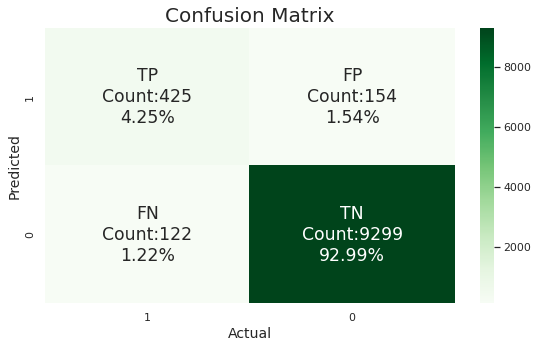

In [ ]:
ch(dtree)

After fitting the model to the whole training set, we find high accuracy (around 97%), while precision and recall are closer to 75%.

**Note:** All confusion matrices in this project are compiled using the validation data.

In [ ]:
tabulate(dtree,'dtree',cvs=m)

,Train Acc,Val Acc,Train Recall,CV Recall,Val Recall
dtree,1.0,0.9724,1.0,0.720732,0.776965


Moreover, we see clear evidence of overfitting when we compare training and validation set results.

#### Logistic Regression

In [ ]:
lr=LogisticRegression()

In [ ]:
m=cv_recall(lr)
print(f'Cross-validated recall is {m}.')

Cross-validated recall is 0.47804878048780486.


The plain logistic regression model performs far worse than the decision tree, with a cross-validated mean recall of under 50%. In other words, this model performs worse than randomly guessing for the positive class (1).

In [ ]:
lr.fit(X_train,y_train)

LogisticRegression()

,Scores
Accuracy,0.967700
Precision,0.839394
Recall,0.506399
F1,0.631699


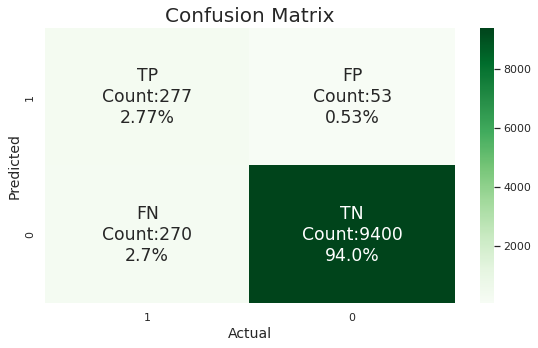

In [ ]:
ch(lr)

As the negative class (0) is by far the majority class, this logistic regression scores better on precision because it predicts few false positives.

In [ ]:
tabulate(lr,'Logistic Regr',cvs=m)

,Train Acc,Val Acc,Train Recall,CV Recall,Val Recall
dtree,1.000000,0.9724,1.00000,0.720732,0.776965
Logistic Regr,0.966967,0.9677,0.47622,0.478049,0.506399


While this model's performance is poor, at least it isn't overfit.

#### Bagging Classifier

In [ ]:
bag=BaggingClassifier(random_state=1)

m=cv_recall(bag)
print(f'Cross-validated recall is {m}.')

Cross-validated recall is 0.7128048780487805.


A CV recall of 71% is much better than the logistlic regression, similar to the decision tree score.

,Scores
Accuracy,0.985500
Precision,0.944690
Recall,0.780622
F1,0.854855


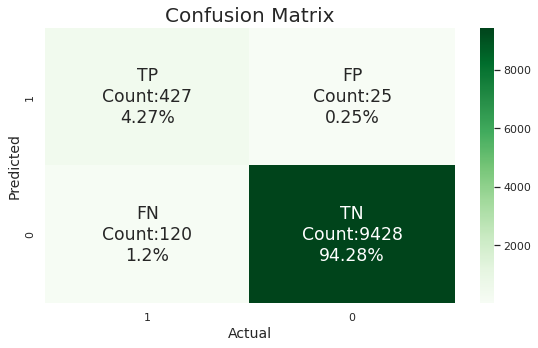

In [ ]:
bag.fit(X_train,y_train)

ch(bag)

In addition to good recall, this model produces high accuracy and precision!

In [ ]:
tabulate(bag,'Bagging Clfr',cvs=m)

,Train Acc,Val Acc,Train Recall,CV Recall,Val Recall
dtree,1.000000,0.9724,1.00000,0.720732,0.776965
Logistic Regr,0.966967,0.9677,0.47622,0.478049,0.506399
Bagging Clfr,0.997233,0.9855,0.95061,0.712805,0.780622


Unfortunately, when comparing training and validation scores, we find that this model is also overfitting (note recall scores).

#### Random Forest

In [ ]:
rf=RandomForestClassifier(random_state=1)

m=cv_recall(rf)
print(f'Cross-validated recall is {m}.')

Cross-validated recall is 0.7567073170731707.


Our second bagging model, random forest, scores a bit better, with a CV recall of around 76%.

,Scores
Accuracy,0.988300
Precision,0.986425
Recall,0.797075
F1,0.881699


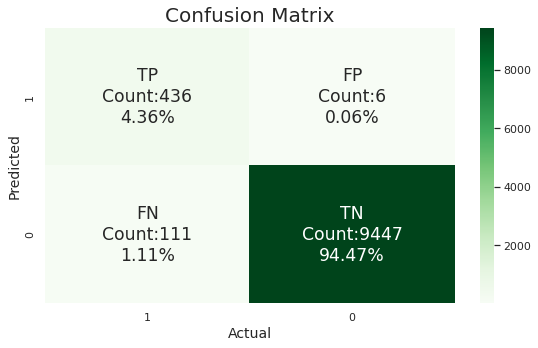

In [ ]:
rf.fit(X_train,y_train)

ch(rf)

Again, precision and accuracy are stellar on the validation data. Note in the confusion matrix above that there are **SIX** false positives in a data set of 10,000! This translates to a specificity (true negative rate) of over 99.9%.

In [ ]:
tabulate(rf,'Random Forest',cvs=m)

,Train Acc,Val Acc,Train Recall,CV Recall,Val Recall
dtree,1.000000,0.9724,1.00000,0.720732,0.776965
Logistic Regr,0.966967,0.9677,0.47622,0.478049,0.506399
Bagging Clfr,0.997233,0.9855,0.95061,0.712805,0.780622
Random Forest,1.000000,0.9883,1.00000,0.756707,0.797075


Our model unfortunately suffers from overfitting.

#### AdaBoost

In [ ]:
abc=AdaBoostClassifier(random_state=1)

m=cv_recall(abc)
print(f'Cross-validated recall is {m}.')

Cross-validated recall is 0.6079268292682926.


While AdaBoost yields a lower CV recall score, at only around 61%, we are hopeful that boosting methods will be less susceptible to overfitting.

,Scores
Accuracy,0.975000
Precision,0.856115
Recall,0.652651
F1,0.740664


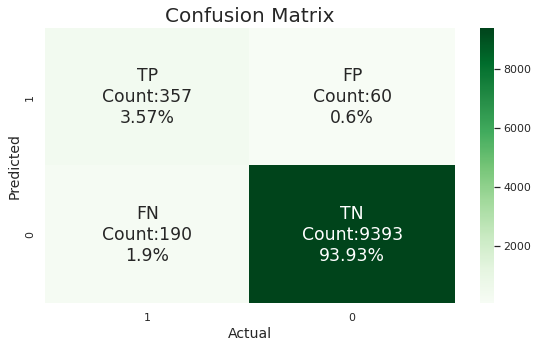

In [ ]:
abc.fit(X_train,y_train)

ch(abc)

An accuracy of 97% and good precision is promising, but the surprising result in the table above is the recall, which is higher than the CV recall calculated above. We find 65% recall on validation data with this model.

In [ ]:
tabulate(abc,'AdaBoost',cvs=m)

,Train Acc,Val Acc,Train Recall,CV Recall,Val Recall
dtree,1.000000,0.9724,1.000000,0.720732,0.776965
Logistic Regr,0.966967,0.9677,0.476220,0.478049,0.506399
Bagging Clfr,0.997233,0.9855,0.950610,0.712805,0.780622
Random Forest,1.000000,0.9883,1.000000,0.756707,0.797075
AdaBoost,0.973900,0.9750,0.626829,0.607927,0.652651


While there is not much evidence of overfitting here, the model performance is appreciably lower than other models.

#### Gradient Boosting

In [ ]:
gbc=GradientBoostingClassifier(random_state=1)

m=cv_recall(gbc)
print(f'Cross-validated recall is {m}.')

Cross-validated recall is 0.7201219512195122.


Gradient boosting has done much better as compared to AdaBoost, with a CV recall of 72%.

,Scores
Accuracy,0.984500
Precision,0.957944
Recall,0.749543
F1,0.841026


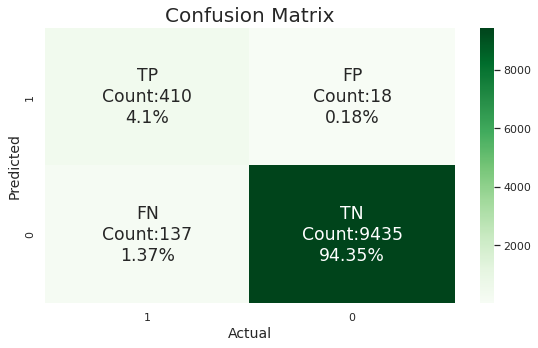

In [ ]:
gbc.fit(X_train,y_train)

ch(gbc)

As with many other models, recall is actually the lowest score of the four metrics above, with accuracy and precision being much higher.

In [ ]:
tabulate(gbc,'Grad Boost',cvs=m)

,Train Acc,Val Acc,Train Recall,CV Recall,Val Recall
dtree,1.000000,0.9724,1.000000,0.720732,0.776965
Logistic Regr,0.966967,0.9677,0.476220,0.478049,0.506399
Bagging Clfr,0.997233,0.9855,0.950610,0.712805,0.780622
Random Forest,1.000000,0.9883,1.000000,0.756707,0.797075
AdaBoost,0.973900,0.9750,0.626829,0.607927,0.652651
Grad Boost,0.987500,0.9845,0.783537,0.720122,0.749543


So far, the gradient boosting model is one of the better models. The only issue is evidence of overfitting (note the recall).

#### XGBoost

In [ ]:
xgb=XGBClassifier(random_state=1)

m=cv_recall(xgb)
print(f'Cross-validated recall is {m}.')

Cross-validated recall is 0.7365853658536585.


A score of 74% is comparable to the better performing models above.

,Scores
Accuracy,0.985900
Precision,0.959276
Recall,0.775137
F1,0.857432


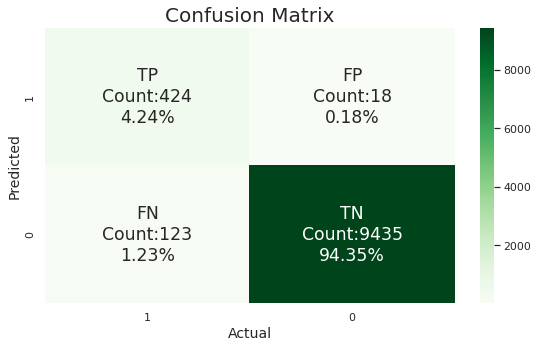

In [ ]:
xgb.fit(X_train,y_train)

ch(xgb)

Recall at 77% is one of the best we've seen so far, and both precision and accuracy scores are quite high.

In [ ]:
tabulate(xgb,'XGBoost',cvs=m)

,Train Acc,Val Acc,Train Recall,CV Recall,Val Recall
dtree,1.000000,0.9724,1.000000,0.720732,0.776965
Logistic Regr,0.966967,0.9677,0.476220,0.478049,0.506399
Bagging Clfr,0.997233,0.9855,0.950610,0.712805,0.780622
Random Forest,1.000000,0.9883,1.000000,0.756707,0.797075
AdaBoost,0.973900,0.9750,0.626829,0.607927,0.652651
Grad Boost,0.987500,0.9845,0.783537,0.720122,0.749543
XGBoost,0.987667,0.9859,0.786585,0.736585,0.775137


Note how much lower the CV recall score is from the training and validation recall scores. The latter two are comparable, so I do not fear overfitting here.

### Model Building with Oversampled data


In [ ]:
# Synthetic Minority Over-sampling TEchnique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

Now we will oversample the minority class of the target variable. The code above was supplied with the notebook.

#### Decision Tree [Oversampled]

In [ ]:
dtree_over=DecisionTreeClassifier(random_state=1)

m=cv_recall(dtree_over,sample_strategy='over')
print(f'Cross-validated recall is {m}.')

Cross-validated recall is 0.9704866008462624.


With such a high CV recall score (97%!), I am skeptical already of this model.

,Scores
Accuracy,0.951000
Precision,0.532423
Recall,0.855576
F1,0.656381


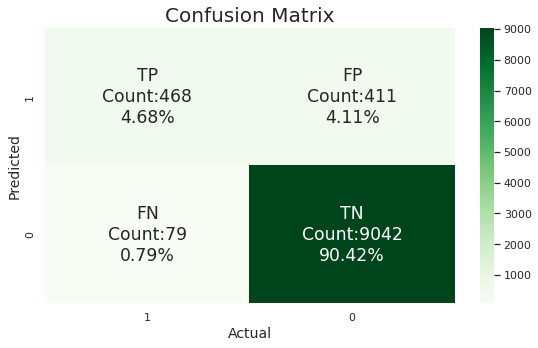

In [ ]:
dtree_over.fit(X_train_over,y_train_over)

ch(dtree_over)

Unlike most of the previous models, recall is higher here than precision. This is certainly due to the oversampling.

In [ ]:
tabulate(dtree_over,'dtree (over)',sample='over',cvs=m)

,Train Acc,Val Acc,Train Recall,CV Recall,Val Recall
dtree,1.000000,0.9724,1.000000,0.720732,0.776965
Logistic Regr,0.966967,0.9677,0.476220,0.478049,0.506399
Bagging Clfr,0.997233,0.9855,0.950610,0.712805,0.780622
Random Forest,1.000000,0.9883,1.000000,0.756707,0.797075
AdaBoost,0.973900,0.9750,0.626829,0.607927,0.652651
Grad Boost,0.987500,0.9845,0.783537,0.720122,0.749543
XGBoost,0.987667,0.9859,0.786585,0.736585,0.775137
dtree (over),1.000000,0.9510,1.000000,0.970487,0.855576


Unsurprisingly though, this model is exceptionally overfit.

#### Logistic Regression [Oversampled]

In [ ]:
lr_over=LogisticRegression()

m=cv_recall(lr_over,sample_strategy='over')
print(f'Cross-validated recall is {m}.')

Cross-validated recall is 0.866784203102962.


A CV recall score of 87% is one of the highest we've seen so far, but isn't so high as to immediately suggest overfitting.

,Scores
Accuracy,0.871800
Precision,0.280072
Recall,0.855576
F1,0.422002


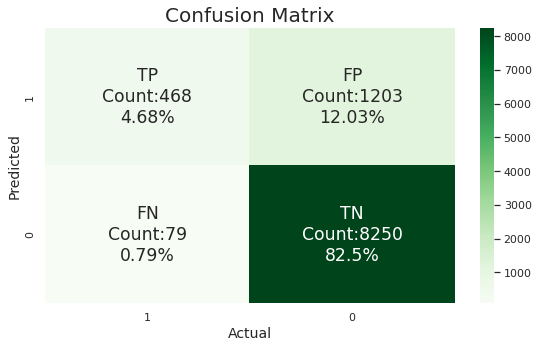

In [ ]:
lr_over.fit(X_train_over,y_train_over)

ch(lr_over)

Both accuracy and recall are quite good with this logistic regression model. The cost, however, is disasterous precision: 28%! The regression's prediction of the positive class is far worse than randomly guessing.

In [ ]:
tabulate(lr_over,'Logistic Regr (over)',sample='over',cvs=m)

,Train Acc,Val Acc,Train Recall,CV Recall,Val Recall
dtree,1.000000,0.9724,1.000000,0.720732,0.776965
Logistic Regr,0.966967,0.9677,0.476220,0.478049,0.506399
Bagging Clfr,0.997233,0.9855,0.950610,0.712805,0.780622
Random Forest,1.000000,0.9883,1.000000,0.756707,0.797075
AdaBoost,0.973900,0.9750,0.626829,0.607927,0.652651
Grad Boost,0.987500,0.9845,0.783537,0.720122,0.749543
XGBoost,0.987667,0.9859,0.786585,0.736585,0.775137
dtree (over),1.000000,0.9510,1.000000,0.970487,0.855576
Logistic Regr (over),0.867331,0.8718,0.866890,0.866784,0.855576


There is no real evidence of overfitting, so this model looks solid. Great accuracy and recall in both training and validation. It's only downside is terrible precision.

#### Bagging Classifier [Oversampled]

In [ ]:
bag_over=BaggingClassifier(random_state=1)

m=cv_recall(bag_over,sample_strategy='over')
print(f'Cross-validated recall is {m}.')

Cross-validated recall is 0.9737658674188999.


As with the last decision tree, this CV recall is high enough (97%) to raise suspicion of overfitting.

,Scores
Accuracy,0.985600
Precision,0.854130
Recall,0.888483
F1,0.870968


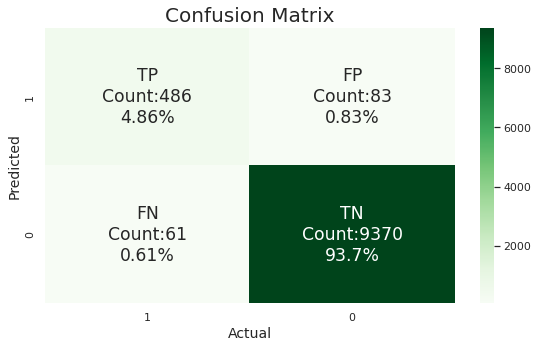

In [ ]:
bag_over.fit(X_train_over,y_train_over)

ch(bag_over)

Great scores across the board, while promising, could be symptomatic of overfitting.

In [ ]:
tabulate(bag_over,'Bagging (over)',sample='over',cvs=m)

,Train Acc,Val Acc,Train Recall,CV Recall,Val Recall
dtree,1.000000,0.9724,1.000000,0.720732,0.776965
Logistic Regr,0.966967,0.9677,0.476220,0.478049,0.506399
Bagging Clfr,0.997233,0.9855,0.950610,0.712805,0.780622
Random Forest,1.000000,0.9883,1.000000,0.756707,0.797075
AdaBoost,0.973900,0.9750,0.626829,0.607927,0.652651
Grad Boost,0.987500,0.9845,0.783537,0.720122,0.749543
XGBoost,0.987667,0.9859,0.786585,0.736585,0.775137
dtree (over),1.000000,0.9510,1.000000,0.970487,0.855576
Logistic Regr (over),0.867331,0.8718,0.866890,0.866784,0.855576
Bagging (over),0.999418,0.9856,0.998907,0.973766,0.888483


Sure enough, this model is overfit (see recall).

#### Random Forest [Oversampled]

In [ ]:
rf_over=RandomForestClassifier(random_state=1)

m=cv_recall(rf_over,sample_strategy='over')
print(f'Cross-validated recall is {m}.')

Cross-validated recall is 0.9824047954866009.


Another questionably high score here: 98%.

,Scores
Accuracy,0.991300
Precision,0.945736
Recall,0.892139
F1,0.918156


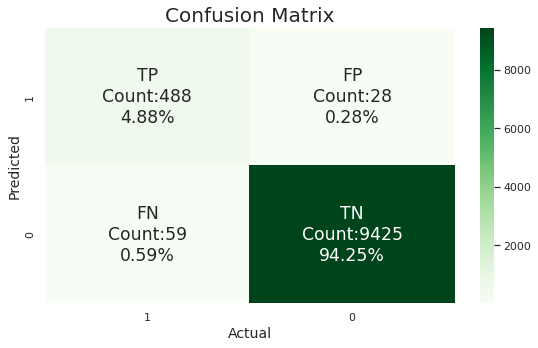

In [ ]:
rf_over.fit(X_train_over,y_train_over)

ch(rf_over)

Again, it would be lovely if these scores were beliveable, but we should first look at the table below to assess whether this model is overfit.

In [ ]:
tabulate(rf_over,'Rand Forest (over)',sample='over',cvs=m)

,Train Acc,Val Acc,Train Recall,CV Recall,Val Recall
dtree,1.000000,0.9724,1.000000,0.720732,0.776965
Logistic Regr,0.966967,0.9677,0.476220,0.478049,0.506399
Bagging Clfr,0.997233,0.9855,0.950610,0.712805,0.780622
Random Forest,1.000000,0.9883,1.000000,0.756707,0.797075
AdaBoost,0.973900,0.9750,0.626829,0.607927,0.652651
Grad Boost,0.987500,0.9845,0.783537,0.720122,0.749543
XGBoost,0.987667,0.9859,0.786585,0.736585,0.775137
dtree (over),1.000000,0.9510,1.000000,0.970487,0.855576
Logistic Regr (over),0.867331,0.8718,0.866890,0.866784,0.855576
Bagging (over),0.999418,0.9856,0.998907,0.973766,0.888483


Indeed, the difference in training and validation recall is enough to confirm overfitting.

#### AdaBoost [Oversampled]

In [ ]:
abc_over=AdaBoostClassifier(random_state=1)

m=cv_recall(abc_over,sample_strategy='over')
print(f'Cross-validated recall is {m}.')

Cross-validated recall is 0.8840267983074753.


We have seen good results with boosting before, so a score of 88% is promising.

,Scores
Accuracy,0.907600
Precision,0.359223
Recall,0.879342
F1,0.510074


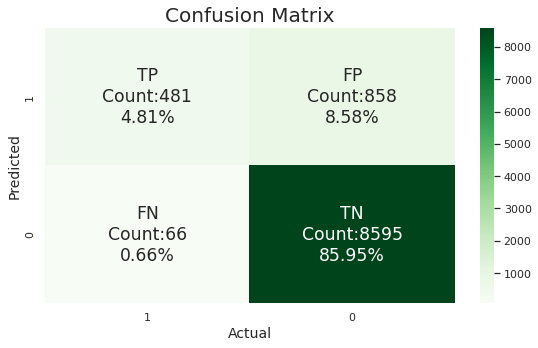

In [ ]:
abc_over.fit(X_train_over,y_train_over)

ch(abc_over)

Here we see that the cost of good recall is poor precision. Indeed, the percentage of false positives is nearly double that of true positives predicted by this AdaBoost model (see confusion matrix).

In [ ]:
tabulate(abc_over,'AdaBoost (over)',sample='over',cvs=m)

,Train Acc,Val Acc,Train Recall,CV Recall,Val Recall
dtree,1.000000,0.9724,1.000000,0.720732,0.776965
Logistic Regr,0.966967,0.9677,0.476220,0.478049,0.506399
Bagging Clfr,0.997233,0.9855,0.950610,0.712805,0.780622
Random Forest,1.000000,0.9883,1.000000,0.756707,0.797075
AdaBoost,0.973900,0.9750,0.626829,0.607927,0.652651
Grad Boost,0.987500,0.9845,0.783537,0.720122,0.749543
XGBoost,0.987667,0.9859,0.786585,0.736585,0.775137
dtree (over),1.000000,0.9510,1.000000,0.970487,0.855576
Logistic Regr (over),0.867331,0.8718,0.866890,0.866784,0.855576
Bagging (over),0.999418,0.9856,0.998907,0.973766,0.888483


This boosting model offers one of the higher recall scores we have seen without overfitting.

#### Gradient Boosting [Oversampled]

In [ ]:
gbc_over=GradientBoostingClassifier(random_state=1)

m=cv_recall(gbc_over,sample_strategy='over')
print(f'Cross-validated recall is {m}.')

Cross-validated recall is 0.9094146685472497.


As with the boosting models trained on the original data, the gradient boosting model here has a better CV recall score than the previous AdaBoost model, at around 91%.

,Scores
Accuracy,0.967100
Precision,0.641927
Recall,0.901280
F1,0.749810


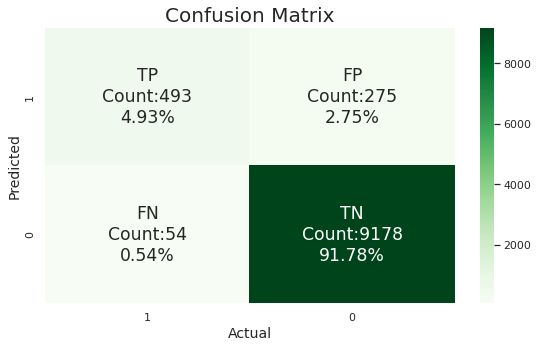

In [ ]:
gbc_over.fit(X_train_over,y_train_over)

ch(gbc_over)

Here too we have good performance on all four metrics. In contrast to the AdaBoost model above, this model offers much better precision, in particular, a score greater than 50%, or random chance. 

In [ ]:
tabulate(gbc_over,'Grad Boost (over)',sample='over',cvs=m)

,Train Acc,Val Acc,Train Recall,CV Recall,Val Recall
dtree,1.000000,0.9724,1.000000,0.720732,0.776965
Logistic Regr,0.966967,0.9677,0.476220,0.478049,0.506399
Bagging Clfr,0.997233,0.9855,0.950610,0.712805,0.780622
Random Forest,1.000000,0.9883,1.000000,0.756707,0.797075
AdaBoost,0.973900,0.9750,0.626829,0.607927,0.652651
Grad Boost,0.987500,0.9845,0.783537,0.720122,0.749543
XGBoost,0.987667,0.9859,0.786585,0.736585,0.775137
dtree (over),1.000000,0.9510,1.000000,0.970487,0.855576
Logistic Regr (over),0.867331,0.8718,0.866890,0.866784,0.855576
Bagging (over),0.999418,0.9856,0.998907,0.973766,0.888483


As we have seen with boosting models, this model does not have much issue with overfitting.

#### XGBoost [Oversampled]

In [ ]:
xgb_over=XGBClassifier(random_state=1)

m=cv_recall(xgb_over,sample_strategy='over')
print(f'Cross-validated recall is {m}.')

Cross-validated recall is 0.9058180535966149.


With comparable performance to gradient boosting, a score of about 91% for XGBoost is unsurprising.

,Scores
Accuracy,0.967100
Precision,0.640464
Recall,0.908592
F1,0.751323


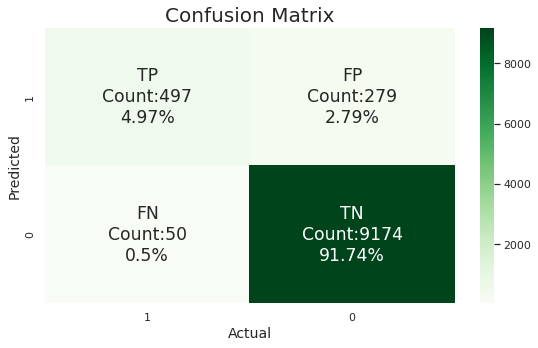

In [ ]:
xgb_over.fit(X_train_over,y_train_over)

ch(xgb_over)

Good or great performance on all metrics, and more true positives than both false positive and false negatives.

In [ ]:
tabulate(xgb_over,'XGBoost (over)',sample='over',cvs=m)

,Train Acc,Val Acc,Train Recall,CV Recall,Val Recall
dtree,1.000000,0.9724,1.000000,0.720732,0.776965
Logistic Regr,0.966967,0.9677,0.476220,0.478049,0.506399
Bagging Clfr,0.997233,0.9855,0.950610,0.712805,0.780622
Random Forest,1.000000,0.9883,1.000000,0.756707,0.797075
AdaBoost,0.973900,0.9750,0.626829,0.607927,0.652651
Grad Boost,0.987500,0.9845,0.783537,0.720122,0.749543
XGBoost,0.987667,0.9859,0.786585,0.736585,0.775137
dtree (over),1.000000,0.9510,1.000000,0.970487,0.855576
Logistic Regr (over),0.867331,0.8718,0.866890,0.866784,0.855576
Bagging (over),0.999418,0.9856,0.998907,0.973766,0.888483


Looking back over this table so far, the gradient boosting and XGBoost models trained on oversampled data have performed best. Random forest boasts promising precision if only we could curtail overfitting.

### Model Building with Undersampled data

In [ ]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_under, y_train_under = rus.fit_resample(X_train, y_train)

Now we undersample the majority class of the target variable. This is another method to balanced the class weights in the target. The code above was supplied in this notebook.

#### Decision Tree [Undersampled]

In [ ]:
dtree_under=DecisionTreeClassifier(random_state=1)

m=cv_recall(dtree_under,sample_strategy='under')
print(f'Cross-validated recall is {m}.')

Cross-validated recall is 0.8530487804878047.


A score of 85% is good for this estimator, but since previous decision trees had a tendency to overfit, I will wait to assess performance until I see the other metrics.

,Scores
Accuracy,0.843900
Precision,0.241853
Recall,0.868373
F1,0.378335


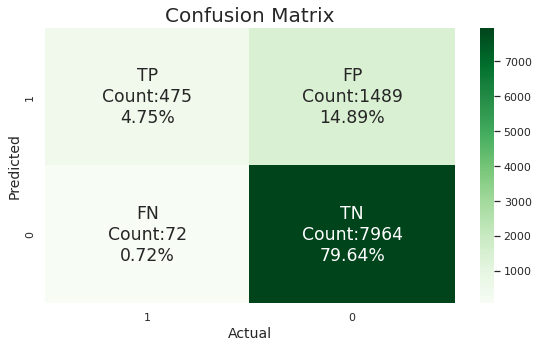

In [ ]:
dtree_under.fit(X_train_under,y_train_under)

ch(dtree_under)

This decision tree is the worst on precision (see the concerning rate of false positives). Recall and accuracy, however, are good.

In [ ]:
tabulate(dtree_under,'dtree (under)',sample='under',cvs=m)

,Train Acc,Val Acc,Train Recall,CV Recall,Val Recall
dtree,1.000000,0.9724,1.000000,0.720732,0.776965
Logistic Regr,0.966967,0.9677,0.476220,0.478049,0.506399
Bagging Clfr,0.997233,0.9855,0.950610,0.712805,0.780622
Random Forest,1.000000,0.9883,1.000000,0.756707,0.797075
AdaBoost,0.973900,0.9750,0.626829,0.607927,0.652651
Grad Boost,0.987500,0.9845,0.783537,0.720122,0.749543
XGBoost,0.987667,0.9859,0.786585,0.736585,0.775137
dtree (over),1.000000,0.9510,1.000000,0.970487,0.855576
Logistic Regr (over),0.867331,0.8718,0.866890,0.866784,0.855576
Bagging (over),0.999418,0.9856,0.998907,0.973766,0.888483


As with the other decision trees, this model overfits disasterously.

#### Logistic Regression [Undersampled]

In [ ]:
lr_under=LogisticRegression()

m=cv_recall(lr_under,sample_strategy='under')
print(f'Cross-validated recall is {m}.')

Cross-validated recall is 0.8445121951219512.


A comparable score to the last model, 84% is promising!

,Scores
Accuracy,0.869900
Precision,0.277450
Recall,0.859232
F1,0.419456


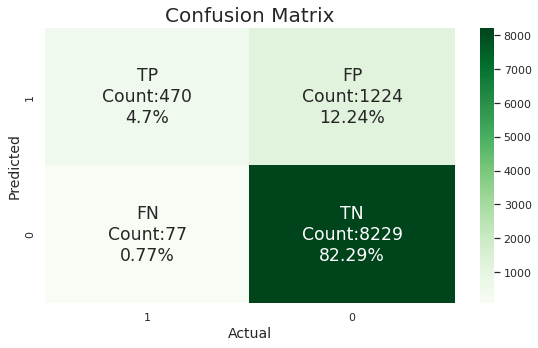

In [ ]:
lr_under.fit(X_train_under,y_train_under)

ch(lr_under)

Again, the false positive rate really cuts into precision (and thus F1) score. Accuracy and recall are good though.

In [ ]:
tabulate(lr_under,'Logistic Regr (under)',sample='under',cvs=m)

,Train Acc,Val Acc,Train Recall,CV Recall,Val Recall
dtree,1.000000,0.9724,1.000000,0.720732,0.776965
Logistic Regr,0.966967,0.9677,0.476220,0.478049,0.506399
Bagging Clfr,0.997233,0.9855,0.950610,0.712805,0.780622
Random Forest,1.000000,0.9883,1.000000,0.756707,0.797075
AdaBoost,0.973900,0.9750,0.626829,0.607927,0.652651
Grad Boost,0.987500,0.9845,0.783537,0.720122,0.749543
XGBoost,0.987667,0.9859,0.786585,0.736585,0.775137
dtree (over),1.000000,0.9510,1.000000,0.970487,0.855576
Logistic Regr (over),0.867331,0.8718,0.866890,0.866784,0.855576
Bagging (over),0.999418,0.9856,0.998907,0.973766,0.888483


Thankfully, this model doesn't overfit. Decent recall would make this a top contender, were it not for the worse-than-guessing precision, which would end up costing ReneWind greatly in inspection costs.

#### Bagging Classifier [Undersampled]

In [ ]:
bag_under=BaggingClassifier(random_state=1)

m=cv_recall(bag_under,sample_strategy='under')
print(f'Cross-validated recall is {m}.')

Cross-validated recall is 0.8713414634146343.


Bagging has been overfitting, so I'm curious to see if the model trained on undersampled data avoids this issue. The cross-validated recall score is 87%.

,Scores
Accuracy,0.947000
Precision,0.508827
Recall,0.895795
F1,0.649007


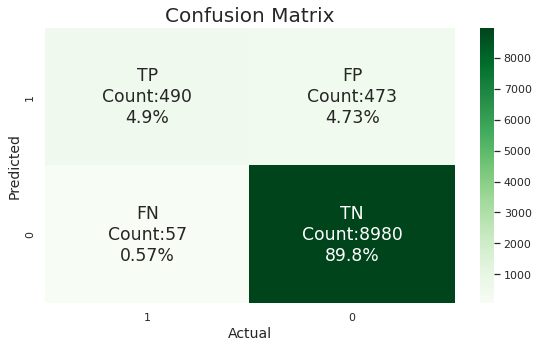

In [ ]:
bag_under.fit(X_train_under,y_train_under)

ch(bag_under)

With about as many false positives as true positives (see confusion matrix), precision lands at 50%, or as good as random guessing. That being said, accuracy and recall and both great.

In [ ]:
tabulate(bag_under,'Bagging (under)',sample='under',cvs=m)

,Train Acc,Val Acc,Train Recall,CV Recall,Val Recall
dtree,1.000000,0.9724,1.000000,0.720732,0.776965
Logistic Regr,0.966967,0.9677,0.476220,0.478049,0.506399
Bagging Clfr,0.997233,0.9855,0.950610,0.712805,0.780622
Random Forest,1.000000,0.9883,1.000000,0.756707,0.797075
AdaBoost,0.973900,0.9750,0.626829,0.607927,0.652651
Grad Boost,0.987500,0.9845,0.783537,0.720122,0.749543
XGBoost,0.987667,0.9859,0.786585,0.736585,0.775137
dtree (over),1.000000,0.9510,1.000000,0.970487,0.855576
Logistic Regr (over),0.867331,0.8718,0.866890,0.866784,0.855576
Bagging (over),0.999418,0.9856,0.998907,0.973766,0.888483


Unfortunately overfitting plagues this model too. Note especially the disparity in recall.

#### Random Forest [Undersampled]

In [ ]:
rf_under=RandomForestClassifier(random_state=1)

m=cv_recall(rf_under,sample_strategy='under')
print(f'Cross-validated recall is {m}.')

Cross-validated recall is 0.8914634146341462.


This model scores 98%, just like the random forest trained on oversampled data.

,Scores
Accuracy,0.963300
Precision,0.609756
Recall,0.914077
F1,0.731529


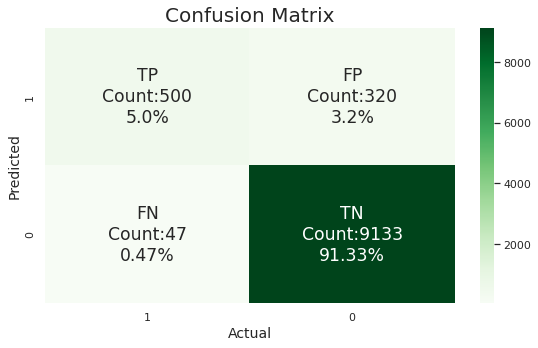

In [ ]:
rf_under.fit(X_train_under,y_train_under)

ch(rf_under)

As with the random forest model trained on oversampled data, the precision is good. Accuracy and recall are high.

In [ ]:
tabulate(rf_under,'Rand Forest (under)',sample='under',cvs=m)

,Train Acc,Val Acc,Train Recall,CV Recall,Val Recall
dtree,1.000000,0.9724,1.000000,0.720732,0.776965
Logistic Regr,0.966967,0.9677,0.476220,0.478049,0.506399
Bagging Clfr,0.997233,0.9855,0.950610,0.712805,0.780622
Random Forest,1.000000,0.9883,1.000000,0.756707,0.797075
AdaBoost,0.973900,0.9750,0.626829,0.607927,0.652651
Grad Boost,0.987500,0.9845,0.783537,0.720122,0.749543
XGBoost,0.987667,0.9859,0.786585,0.736585,0.775137
dtree (over),1.000000,0.9510,1.000000,0.970487,0.855576
Logistic Regr (over),0.867331,0.8718,0.866890,0.866784,0.855576
Bagging (over),0.999418,0.9856,0.998907,0.973766,0.888483


While this model is surely overfit, tuning might just curtail the issue. And with a decent precision score, this model might be worth tuning to hang onto the cost savings good precision affords.

#### AdaBoost [Undersampled]

In [ ]:
abc_under=AdaBoostClassifier(random_state=1)

m=cv_recall(abc_under,sample_strategy='under')
print(f'Cross-validated recall is {m}.')

Cross-validated recall is 0.8591463414634146.


The cross-validated recall score for this AdaBoost classifier is 86%.

,Scores
Accuracy,0.894100
Precision,0.325850
Recall,0.875686
F1,0.474963


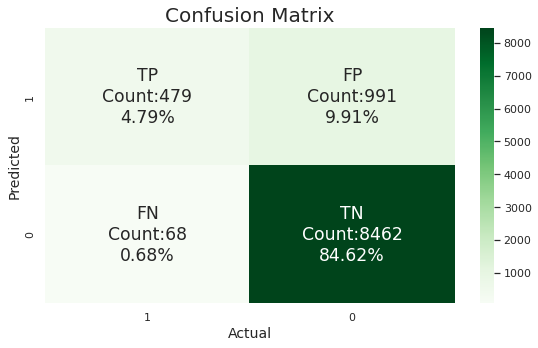

In [ ]:
abc_under.fit(X_train_under,y_train_under)

ch(abc_under)

While both accuracy and recall are good on the validation set, precision is really quite poor.

In [ ]:
tabulate(abc_under,'AdaBoost (under)',sample='under',cvs=m)

,Train Acc,Val Acc,Train Recall,CV Recall,Val Recall
dtree,1.000000,0.9724,1.000000,0.720732,0.776965
Logistic Regr,0.966967,0.9677,0.476220,0.478049,0.506399
Bagging Clfr,0.997233,0.9855,0.950610,0.712805,0.780622
Random Forest,1.000000,0.9883,1.000000,0.756707,0.797075
AdaBoost,0.973900,0.9750,0.626829,0.607927,0.652651
Grad Boost,0.987500,0.9845,0.783537,0.720122,0.749543
XGBoost,0.987667,0.9859,0.786585,0.736585,0.775137
dtree (over),1.000000,0.9510,1.000000,0.970487,0.855576
Logistic Regr (over),0.867331,0.8718,0.866890,0.866784,0.855576
Bagging (over),0.999418,0.9856,0.998907,0.973766,0.888483


This model performs well for recall, but insufficient precision would cost ReneWind in the long run.

#### Gradient Boosting [Undersampled]

In [ ]:
gbc_under=GradientBoostingClassifier(random_state=1)

m=cv_recall(gbc_under,sample_strategy='under')
print(f'Cross-validated recall is {m}.')

Cross-validated recall is 0.8847560975609756.


A CV recall score of 88% is slightly less than that of the Gradient Boosting classifier trained on oversampled data.

,Scores
Accuracy,0.951700
Precision,0.534409
Recall,0.908592
F1,0.672986


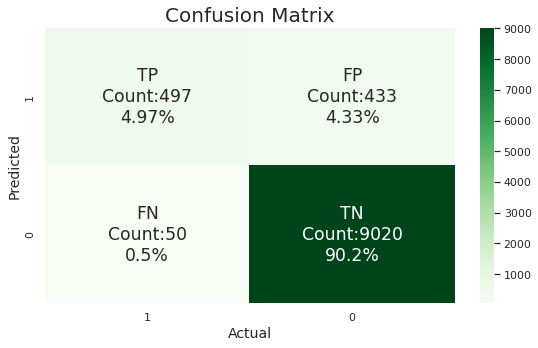

In [ ]:
gbc_under.fit(X_train_under,y_train_under)

ch(gbc_under)

Accuracy and recall are both great, and as this is a boosting model, I do not fear overfitting. Precision is about as good as guessing: compare the true positives and false positives in the confusion matrix above.

In [ ]:
tabulate(gbc_under,'Grad Boost (under)',sample='under',cvs=m)

,Train Acc,Val Acc,Train Recall,CV Recall,Val Recall
dtree,1.000000,0.9724,1.000000,0.720732,0.776965
Logistic Regr,0.966967,0.9677,0.476220,0.478049,0.506399
Bagging Clfr,0.997233,0.9855,0.950610,0.712805,0.780622
Random Forest,1.000000,0.9883,1.000000,0.756707,0.797075
AdaBoost,0.973900,0.9750,0.626829,0.607927,0.652651
Grad Boost,0.987500,0.9845,0.783537,0.720122,0.749543
XGBoost,0.987667,0.9859,0.786585,0.736585,0.775137
dtree (over),1.000000,0.9510,1.000000,0.970487,0.855576
Logistic Regr (over),0.867331,0.8718,0.866890,0.866784,0.855576
Bagging (over),0.999418,0.9856,0.998907,0.973766,0.888483


This is one of the better models we've seen. Great recall and accuracy, at around 91% and 95% respectively.

#### XGBoost [Undersampled]

In [ ]:
xgb_under=XGBClassifier(random_state=1)

m=cv_recall(xgb_under,sample_strategy='under')
print(f'Cross-validated recall is {m}.')

Cross-validated recall is 0.8774390243902438.


A CV recall score of 88% is good, comparable with the previous gradient boosting model.

,Scores
Accuracy,0.959800
Precision,0.586207
Recall,0.901280
F1,0.710375


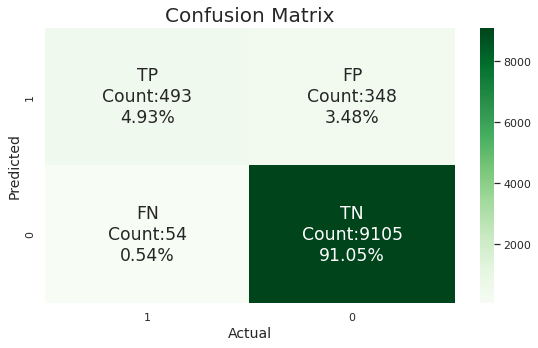

In [ ]:
xgb_under.fit(X_train_under,y_train_under)

ch(xgb_under)

This model scores comparably on accuracy and recall to the previous model, but improves on precision! (Compare 53% to 59%.)

In [ ]:
tabulate(xgb_under,'XGBoost (under)',sample='under',cvs=m)

,Train Acc,Val Acc,Train Recall,CV Recall,Val Recall
dtree,1.000000,0.9724,1.000000,0.720732,0.776965
Logistic Regr,0.966967,0.9677,0.476220,0.478049,0.506399
Bagging Clfr,0.997233,0.9855,0.950610,0.712805,0.780622
Random Forest,1.000000,0.9883,1.000000,0.756707,0.797075
AdaBoost,0.973900,0.9750,0.626829,0.607927,0.652651
Grad Boost,0.987500,0.9845,0.783537,0.720122,0.749543
XGBoost,0.987667,0.9859,0.786585,0.736585,0.775137
dtree (over),1.000000,0.9510,1.000000,0.970487,0.855576
Logistic Regr (over),0.867331,0.8718,0.866890,0.866784,0.855576
Bagging (over),0.999418,0.9856,0.998907,0.973766,0.888483


Another promising model. Great recall and accuracy, without excessive detriment to precision.

## HyperparameterTuning 

### Model Finalists

We'll assemble some candidate finalists and compare them in a table. The following function computes many performance metrics for a given model.

In [ ]:
def model_scores(model,*,sample):

  X_val_pred=model.predict(X_val)
  if sample==None:
    y_tr=y_train
    y_pred=model.predict(X_train)
  elif sample=='over':
    y_tr=y_train_over
    y_pred=model.predict(X_train_over)
  elif sample=='under':
    y_tr=y_train_under
    y_pred=model.predict(X_train_under)
  else:
    raise ValueError("Sample parameter takes values in {None,'over','under'}.")
  
  ser=pd.Series(dtype=float)

  # accuracy
  ser.loc['Train Accuracy']=metrics.accuracy_score(y_tr,y_pred)
  ser.loc['Validation Accuracy']=metrics.accuracy_score(y_val,X_val_pred)

  # recall
  ser.loc['Train Recall']=metrics.recall_score(y_tr,y_pred)
  ser.loc['Validation Recall']=metrics.recall_score(y_val,X_val_pred)

  # validation precision and f1
  ser.loc['Validation Precision']=metrics.precision_score(y_val,X_val_pred)
  ser.loc['Validation F1']=metrics.f1_score(y_val,X_val_pred)
  return ser

In [ ]:
finalists=pd.DataFrame()
finalists['Bag_over']=model_scores(bag_over,sample='over')
finalists['Bag_under']=model_scores(bag_under,sample='under')
finalists['RF']=model_scores(rf,sample=None)
finalists['RF_over']=model_scores(rf_over,sample='over')
finalists['RF_under']=model_scores(rf_under,sample='under')
finalists['GB_over']=model_scores(gbc_over,sample='over')
finalists['GB_under']=model_scores(gbc_under,sample='under')
finalists['XGB_over']=model_scores(xgb_over,sample='over')
finalists['XGB_under']=model_scores(xgb_under,sample='under')

From the model building process, we compile a list of candidates for tuning.

In [ ]:
finalists

,Bag_over,Bag_under,RF,RF_over,RF_under,GB_over,GB_under,XGB_over,XGB_under
Train Accuracy,0.999418,0.991463,1.000000,1.000000,1.000000,0.942719,0.952439,0.939774,0.949390
Validation Accuracy,0.985600,0.947000,0.988300,0.991300,0.963300,0.967100,0.951700,0.967100,0.959800
Train Recall,0.998907,0.985366,1.000000,1.000000,1.000000,0.914245,0.917073,0.906946,0.908537
Validation Recall,0.888483,0.895795,0.797075,0.892139,0.914077,0.901280,0.908592,0.908592,0.901280
Validation Precision,0.854130,0.508827,0.986425,0.945736,0.609756,0.641927,0.534409,0.640464,0.586207
Validation F1,0.870968,0.649007,0.881699,0.918156,0.731529,0.749810,0.672986,0.751323,0.710375


* The bagging classifiers are outperformed by the random forest classifiers in every metric. Accordingly, we would rather just study the random forest models.

* I am curious to tune at least one model with the original data. Random forest performed best in this category.

* The random forest models trained on both oversampled and undersampled data are strong. While the undersamped model shows higher validation recall, the oversampled model boasts impressive precision and F1, without much sacrifice in recall. A model with both stellar recall _and_ good precision will further cut down on operating costs for ReneWind. The only issue with the random forest models is their overfitting. We will tune both to eliminate overfitting and find out which model comes out on top.

* Both gradient boosting and XGBoost performed exceptionally. Additionally, these models did not treaten overfitting as much as the random forest models. The models trained on oversampled data and undersampled data boast great accuracy and recall. We will favor the oversampled ones, since their precision beats undersampled, and we'll tune both `GB_over` and `XGB_over`.

### Random Forest

In [ ]:
params={'n_estimators':np.arange(100,250,50),
        'max_depth':np.arange(3,10),
        'class_weight':[None,'balanced']}

We will start by tuning the random forest trained on the original data. We vary `n_estimators` in an attempt to improve performance. We use `max_depth` to control overfitting, and balancing `class_weight` should help with recall on our highly unbalanced data set.

In [ ]:
rf_tuned=RandomForestClassifier(random_state=2)

search=RandomizedSearchCV(estimator=rf_tuned,
                          param_distributions=params,
                          n_iter=20,
                          scoring='recall',
                          n_jobs=-1,
                          cv=5,
                          verbose=1,
                          random_state=1)

search.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=2),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'class_weight': [None, 'balanced'],
                                        'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([100, 150, 200])},
                   random_state=1, scoring='recall', verbose=1)

In [ ]:
search.best_params_

{'n_estimators': 100, 'max_depth': 5, 'class_weight': 'balanced'}

It turns out fewer estimators yielded better recall. A depth of 5, roughly in the middle of our proposed range, is better, and balanced class weights won out over no weighted classes.

In [ ]:
best_rf=search.best_params_

# fit model with best params
rf_tuned=rf_tuned=RandomForestClassifier(
    random_state=2,
    n_jobs=-1,
    **best_rf
)

rf_tuned.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, n_jobs=-1,
                       random_state=2)

The trained estimator has the following performance on validation data.

,Scores
Accuracy,0.950400
Precision,0.528365
Recall,0.868373
F1,0.656985


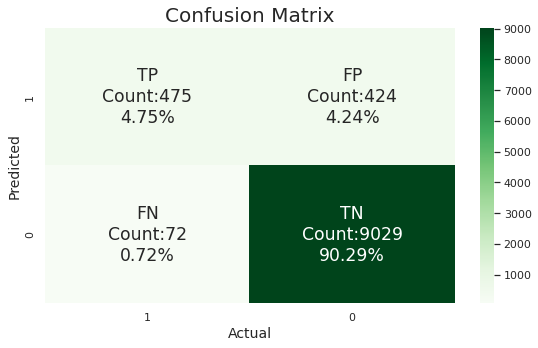

In [ ]:
ch(rf_tuned)

In [ ]:
tuned_models=pd.DataFrame()

tuned_models['RF']=model_scores(rf_tuned,sample=None)
tuned_models

,RF
Train Accuracy,0.950633
Validation Accuracy,0.950400
Train Recall,0.878049
Validation Recall,0.868373
Validation Precision,0.528365
Validation F1,0.656985


Accuracy is stellar and certainly **not** overfit. Recall is good, at around 87%. Precision is a bit lower: not much more than 50%, i.e., random guessing. While precision is not our number one priority, other finalist models demonstrate good precision too, which would further reduce costs for ReneWind.

### Random Forest [Oversampled]

In [ ]:
params={'n_estimators':np.arange(250,350,25),
        'max_depth':np.arange(4,9),
        'max_features':['sqrt',0.5]}

Again, we vary the number of estimators with the goal of improving performance. We will curtail overfitting with the `max_depth` and `max_features` parameters. The latter should also aid performance. (After many trials, I discovered that low values of `n_estimators` caused some overfitting, so I set 250 as the minimum value in the parameter distribution.)

Additionally, we instantiate the estimator with `min_samples_leaf=2` to further prevent overfitting: a leaf cannot consist of a single datum. This reduces occurances of the model memorizing noise in the training data.

In [ ]:
rf_over_tuned=RandomForestClassifier(random_state=2,min_samples_leaf=2)

search=RandomizedSearchCV(estimator=rf_over_tuned,
                          param_distributions=params,
                          n_iter=15,
                          scoring='recall',
                          n_jobs=-1,
                          cv=5,
                          verbose=1,
                          random_state=1)

search.fit(X_train_over,y_train_over)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(min_samples_leaf=2,
                                                    random_state=2),
                   n_iter=15, n_jobs=-1,
                   param_distributions={'max_depth': array([4, 5, 6, 7, 8]),
                                        'max_features': ['sqrt', 0.5],
                                        'n_estimators': array([250, 275, 300, 325])},
                   random_state=1, scoring='recall', verbose=1)

In [ ]:
search.best_params_

{'n_estimators': 325, 'max_features': 0.5, 'max_depth': 8}

We find that greater depth and more estimators increase recall. Additionally, taking 50% of features (greater than $\sqrt{\text{num_features}}$) yielded a higher score.

In [ ]:
best_rf_over=search.best_params_

# fit model with best params
rf_over_tuned=RandomForestClassifier(
    random_state=2,
    min_samples_leaf=2,
    n_jobs=-1,
    **best_rf_over
)

rf_over_tuned.fit(X_train_over,y_train_over)

RandomForestClassifier(max_depth=8, max_features=0.5, min_samples_leaf=2,
                       n_estimators=325, n_jobs=-1, random_state=2)

,Scores
Accuracy,0.978800
Precision,0.754173
Recall,0.908592
F1,0.824212


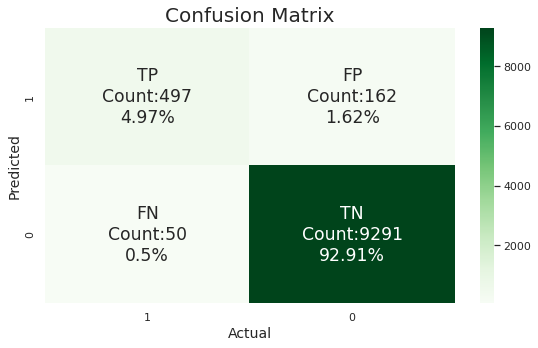

In [ ]:
ch(rf_over_tuned)

The metrics for validation data are great: 91% recall and around 98% accuracy. Precision is good too, at around 75%, yielding an F1 score of 82%. Note especially the rarity of false negatives in the confusion matrix above.

In [ ]:
tuned_models['RF_over']=model_scores(rf_over_tuned,sample='over')
tuned_models

,RF,RF_over
Train Accuracy,0.950633,0.950864
Validation Accuracy,0.950400,0.978800
Train Recall,0.878049,0.916890
Validation Recall,0.868373,0.908592
Validation Precision,0.528365,0.754173
Validation F1,0.656985,0.824212


Comparing with training data, there's not much concern for overfitting here. Recall is locked in around 91%, and precision is a good improvement on the previous random forest model.

### Random Forest [Undersampled]

In [ ]:
params={'n_estimators':np.arange(150,300,50),
        'max_depth':np.arange(3,10),
        'max_features':['sqrt',0.5]}

As with the last model, we will test values for `n_estimators`, `max_depth`, and `max_features`. Mostly, we are looking to prevent overfitting.

In [ ]:
rf_under_tuned=RandomForestClassifier(random_state=2,min_samples_leaf=2)

search=RandomizedSearchCV(estimator=rf_under_tuned,
                          param_distributions=params,
                          n_iter=30,
                          scoring='recall',
                          n_jobs=-1,
                          cv=5,
                          verbose=1,
                          random_state=1)

search.fit(X_train_under,y_train_under)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(min_samples_leaf=2,
                                                    random_state=2),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                                        'max_features': ['sqrt', 0.5],
                                        'n_estimators': array([150, 200, 250])},
                   random_state=1, scoring='recall', verbose=1)

In [ ]:
search.best_params_

{'n_estimators': 150, 'max_features': 'sqrt', 'max_depth': 9}

In this case, fewer estimators and fewer features yielded better results. Like the previous model, a greater depth was preferable.

In [ ]:
best_rf_under=search.best_params_

# fit model with best params
rf_under_tuned=RandomForestClassifier(
    random_state=2,
    min_samples_leaf=2,
    n_jobs=-1,
    **best_rf_under
)

rf_under_tuned.fit(X_train_under,y_train_under)

RandomForestClassifier(max_depth=9, min_samples_leaf=2, n_estimators=150,
                       n_jobs=-1, random_state=2)

,Scores
Accuracy,0.966000
Precision,0.630847
Recall,0.912249
F1,0.745889


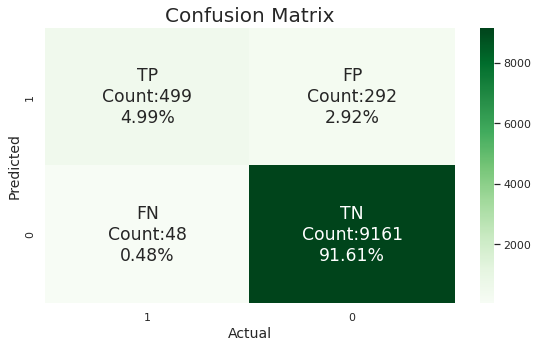

In [ ]:
ch(rf_under_tuned)

In [ ]:
tuned_models['RF_under']=model_scores(rf_under_tuned,sample='under')
tuned_models

,RF,RF_over,RF_under
Train Accuracy,0.950633,0.950864,0.958841
Validation Accuracy,0.950400,0.978800,0.966000
Train Recall,0.878049,0.916890,0.918902
Validation Recall,0.868373,0.908592,0.912249
Validation Precision,0.528365,0.754173,0.630847
Validation F1,0.656985,0.824212,0.745889


Performance here is quite similar to the last model. What's different, however, is the consistency across data sets: the difference between training and validation scores is less than that of the previous model. Recall is reliably 91%. It only falls short of the previous model in precision.

### Gradient Boosting [Oversampled]

In [ ]:
params={'n_estimators':np.arange(50,125,25),
        'subsample':[0.5,0.75],
        'max_depth':[3,4]}

After many trials, the main issue with tuned gradient boosting was overfitting. Keeping `n_estimators` low helped curtail this issue, as did taking values for `subsample` less than 1. Adjusting `max_depth` assisted with increasing precision without much impact on recall.

In [ ]:
gbc_over_tuned=GradientBoostingClassifier(random_state=2,min_samples_leaf=4)

search=RandomizedSearchCV(estimator=gbc_over_tuned,
                          param_distributions=params,
                          n_iter=8,
                          scoring='recall',
                          n_jobs=-1,
                          cv=5,
                          verbose=1,
                          random_state=1)

search.fit(X_train_over,y_train_over)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


RandomizedSearchCV(cv=5,
                   estimator=GradientBoostingClassifier(min_samples_leaf=4,
                                                        random_state=2),
                   n_iter=8, n_jobs=-1,
                   param_distributions={'max_depth': [3, 4],
                                        'n_estimators': array([ 50,  75, 100]),
                                        'subsample': [0.5, 0.75]},
                   random_state=1, scoring='recall', verbose=1)

In [ ]:
search.best_params_

{'subsample': 0.5, 'n_estimators': 100, 'max_depth': 4}

The model certainly leaned toward the high end of `n_estimators`, but previous trials revealed that a value any higher than 100 introduced overfitting issues. Better results were observed with lower `subsample` and higher `max_depth`.

In [ ]:
best_gbc_over=search.best_params_

# fit model with best params
gbc_over_tuned=GradientBoostingClassifier(
    random_state=2,
    min_samples_leaf=4,
    **best_gbc_over
)

gbc_over_tuned.fit(X_train_over,y_train_over)

GradientBoostingClassifier(max_depth=4, min_samples_leaf=4, random_state=2,
                           subsample=0.5)

,Scores
Accuracy,0.977600
Precision,0.739259
Recall,0.912249
F1,0.816694


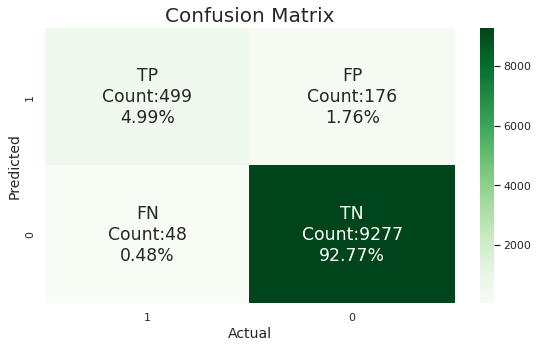

In [ ]:
ch(gbc_over_tuned)

In [ ]:
tuned_models['GBC_over']=model_scores(gbc_over_tuned,sample='over')
tuned_models

,RF,RF_over,RF_under,GBC_over
Train Accuracy,0.950633,0.950864,0.958841,0.953138
Validation Accuracy,0.950400,0.978800,0.966000,0.977600
Train Recall,0.878049,0.916890,0.918902,0.924260
Validation Recall,0.868373,0.908592,0.912249,0.912249
Validation Precision,0.528365,0.754173,0.630847,0.739259
Validation F1,0.656985,0.824212,0.745889,0.816694


This model performs comparably to `RF_over`, which is to say, fantastically! Accuracy is solidly in the 95-98% range, with recall at 91%. Precision clocks in at 74%, one of our top scores for these finalist models.

### XGBoost [Oversampled]

In [ ]:
params={'eta':[0.05,0.1,0.15],
        'colsample_bytree':[0.5,0.75,1.0],
        'max_depth':np.arange(2,5)}

After much experimentation, I narrowed down the parameter space to `eta` (=`learning_rate`), `colsample_bytree`, and `max_depth`. All three parameters will be used to control overfitting and improve performance on secondary metrics, like precision, since recall is solidly around 90% across a large swath of the parameter space.

What's more, by instantiating the classifier with `tree_method='gpu_hist'`, training time is lightnight fast! So fast, in fact, that I am able to run exhaustive parameter searches with `GridSearchCV` nearly instantly.

In [ ]:
xgb_over_tuned=XGBClassifier(random_state=1,
                       tree_method='gpu_hist')

go=GridSearchCV(estimator=xgb_over_tuned,
                param_grid=params,
                scoring='recall',
                cv=5,
                n_jobs=-1,
                verbose=1)

go.fit(X_train_over,y_train_over)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(random_state=1, tree_method='gpu_hist'),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.5, 0.75, 1.0],
                         'eta': [0.05, 0.1, 0.15],
                         'max_depth': array([2, 3, 4])},
             scoring='recall', verbose=1)

In [ ]:
go.best_params_

{'colsample_bytree': 1.0, 'eta': 0.05, 'max_depth': 4}

The best setting for `colsample_bytree` turns out to be the default. I found that `eta` wanted to be as low as possible, but any lower than 0.05 threatened overfitting. Reducing `max_depth` to 4 (from the default of 6) certainly did prevent overfitting.

In [ ]:
best_xgb_over=go.best_params_

# fit model with best params
xgb_over_tuned=XGBClassifier(
    random_state=1,
    tree_method='gpu_hist',
    **best_xgb_over
)

xgb_over_tuned.fit(X_train_over,y_train_over)

XGBClassifier(colsample_bytree=1.0, eta=0.05, max_depth=4, random_state=1,
              tree_method='gpu_hist')

,Scores
Accuracy,0.978800
Precision,0.754947
Recall,0.906764
F1,0.823920


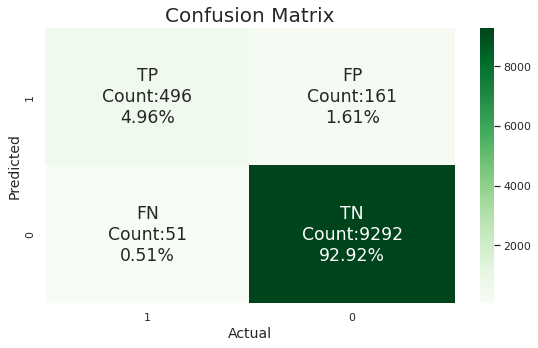

In [ ]:
ch(xgb_over_tuned)

In [ ]:
tuned_models['XGB_over']=model_scores(xgb_over_tuned,sample='over')
tuned_models

,RF,RF_over,RF_under,GBC_over,XGB_over
Train Accuracy,0.950633,0.950864,0.958841,0.953138,0.950934
Validation Accuracy,0.950400,0.978800,0.966000,0.977600,0.978800
Train Recall,0.878049,0.916890,0.918902,0.924260,0.918900
Validation Recall,0.868373,0.908592,0.912249,0.912249,0.906764
Validation Precision,0.528365,0.754173,0.630847,0.739259,0.754947
Validation F1,0.656985,0.824212,0.745889,0.816694,0.823920


Performance here is nearly identical to `RF_over` and `GBC_over`. Great recall will surely be a cost savings for ReneWind, and good precision will help too!

## Model performance comparison and choosing the final model

In [ ]:
tuned_models

,RF,RF_over,RF_under,GBC_over,XGB_over
Train Accuracy,0.950633,0.950864,0.958841,0.953138,0.950934
Validation Accuracy,0.950400,0.978800,0.966000,0.977600,0.978800
Train Recall,0.878049,0.916890,0.918902,0.924260,0.918900
Validation Recall,0.868373,0.908592,0.912249,0.912249,0.906764
Validation Precision,0.528365,0.754173,0.630847,0.739259,0.754947
Validation F1,0.656985,0.824212,0.745889,0.816694,0.823920


* All models boast accuracy in the 95-97% range without overfitting.

* The random forest trained on the original data scores worst on recall, so it will not be the final model. Every other model has a recall score squarely in the 91-92% range.

* Precision is an important secondary metric, as has been discussed throughout. While recall will cut down on ReneWind's greatest expense, namely repair and replacement costs, precision reduces the instances where an inspection is unnecessary. This reduces money wasted on needless inspections. Of the remaining models, the random forest trained on undersampled data scores worst on precision, so it will not be the final model.

### Test set final performance

To choose the best model, we'll look at performance on completely unseen data.

In [ ]:
test_data=pd.read_csv('Renewind_Test.csv')

In [ ]:
X_test=test_data.drop('Target',axis=1)
y_test=test_data['Target']

X_test=pre.transform(X_test)

After spliting the data into predictor features and target, we run `X_test` through the preprocessing pipeline defined earlier. This pipeline includes a scaler and an imputer.

In [ ]:
test_perf=pd.DataFrame()

def test_scores(model):

  y_pred=model.predict(X_test)
  ser=pd.Series(dtype=float)

  ser.loc['Test Accuracy']=metrics.accuracy_score(y_test,y_pred)
  ser.loc['Test Recall']=metrics.recall_score(y_test,y_pred)
  ser.loc['Test Precision']=metrics.precision_score(y_test,y_pred)
  return ser

This funciton will compile metrics.

In [ ]:
test_perf['RF']=test_scores(rf_over_tuned)
test_perf['GBC']=test_scores(gbc_over_tuned)
test_perf['XGB']=test_scores(xgb_over_tuned)
test_perf

,RF,GBC,XGB
Test Accuracy,0.977600,0.974200,0.974600
Test Recall,0.861060,0.872029,0.870201
Test Precision,0.760905,0.717293,0.722307


Interesting! Recall is lower on the testing data than on training and validation data. All three models score around 97% on accuracy, and around 87% on recall. What sets apart our winner is its precision score. The random forest model has noticably better precision (76%), which will cut down on inspection costs for ReneWind.

The best model is the tuned random forest trained on the oversampled data.

## Pipelines to build the final model


Our preprocessing pipeline was already most of what we needed, so we will add to what was already built above.

In [ ]:
transformers=[
    ('Scaler',StandardScaler()),
    ('Imputer',KNNImputer()),
    ('Predictor',rf_over_tuned)
]
pipe=Pipeline(transformers)

The three steps in our pipeline are scaling, imputing, and predicting.

In [ ]:
pipe.fit(X_train_over,y_train_over)

Pipeline(steps=[('Scaler', StandardScaler()), ('Imputer', KNNImputer()),
                ('Predictor',
                 RandomForestClassifier(max_depth=8, max_features=0.5,
                                        min_samples_leaf=2, n_estimators=325,
                                        n_jobs=-1, random_state=2))])

This pipeline can be used to quickly process new data and subsequently make predictions for possible inspections.

# Business Insights and Conclusions

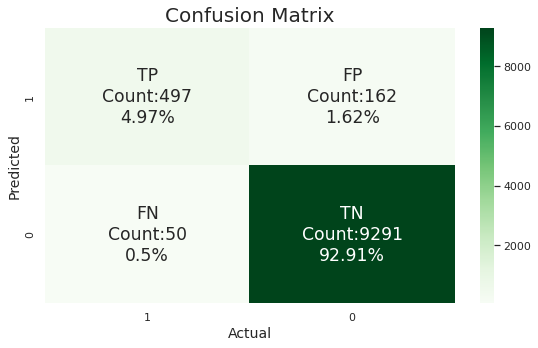

In [ ]:
ch(pipe,show_scores=False)

ReneWind incurs the following maintenance costs: 
* \$40,000 - generator replacement,
* \$15,000 - generator repair,
* \$5,00 - generator inspection.

To save money on maintenance, ReneWind must reduce occurances of replacement first. The company spends money unnecessarily when sensors do not alert technicians that a component has failed. This will lead to degredation or outright failure of the generator, necessitating replacement. Such situations are coded as false negatives, and we built a model that avoids false negatives. Our model correctly predicts component failures 86% of the time. Note how few instances of false negatives (FN) are present in the confusion matrix above.

While repair costs are inevitable, unnecessary inspections add expense without any operational benefit. Cutting down on inspection costs means reducing false negatives; a false negative is predicting failure in a generator where the compontents are all functioning. For every three superfluous inspections, ReneWind can afford another generator repair, so these savings translate into serious business gains. Our model correctly rejects false negatives 76% of the time, allowing technicians to spend more work hours on generators in genuine need of repair. The additional savings our model offers by reducing unnecessary inspections can be put toward repair expenses, meaning ReneWind's expenses are going toward maintaining their generator infrastructure without much overhead.

***